# Real Estate Market Analysis

# 1) Show me the market trends to help me decide. Which US real-estate market is doing best overall. 10 points (**Matt Henning**)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [4]:
# Load datasets
zhvi_data = pd.read_csv('ZHVI_Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')
zori_data = pd.read_csv('ZORI_Metro_zordi_uc_sfr_month.csv')
market_temp_data = pd.read_csv('MARKET_TEMP_Metro_market_temp_index_uc_sfrcondo_month.csv')
dttp_data = pd.read_csv('DTTP_Metro_mean_doz_pending_uc_sfrcondo_month.csv')
inventory_data = pd.read_csv('FOR_SALE_INVENTORY_Metro_invt_fs_uc_sfr_sm_month.csv')

# Display data to ensure it loaded
zhvi_data.head(), zori_data.head(), market_temp_data.head(), dttp_data.head(), inventory_data.head()
# Reshape datasets for 2023-2024
def reshape_and_filter(df, id_vars, value_name, start_year=2023, end_year=2024):
    df_long = df.melt(id_vars=id_vars, var_name="Date", value_name=value_name)
    df_long["Date"] = pd.to_datetime(df_long["Date"], errors="coerce")
    return df_long[
        (df_long["Date"].dt.year >= start_year) & (df_long["Date"].dt.year <= end_year)
    ]

## Which US Real Estate Market is Doing Best Overall?

In [8]:
# Extract the latest data for analysis, rename for zhvi and zori to clarify and tracking
zhvi_latest = zhvi_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'ZHVI_Latest'})
zori_latest = zori_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'ZORI_Latest'})
market_temp_latest = market_temp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'MarketTemp_Latest'})

# Merge datasets, merging the zhvi and zori for region and state, makes it more clear and remove united states as a region
combined_data = pd.merge(zhvi_latest, zori_latest, on=['RegionName', 'StateName'], how='inner')
combined_data = pd.merge(combined_data, market_temp_latest, on=['RegionName', 'StateName'], how='inner')

# Rank markets by metrics, metrics being "hottest" by state/region 
combined_data['ZHVI_Rank'] = combined_data['ZHVI_Latest'].rank(ascending=False)
combined_data['ZORI_Rank'] = combined_data['ZORI_Latest'].rank(ascending=False)
combined_data['MarketTemp_Rank'] = combined_data['MarketTemp_Latest'].rank(ascending=False)

# Calculate overall rank
combined_data['Overall_Rank'] = combined_data[['ZHVI_Rank', 'ZORI_Rank', 'MarketTemp_Rank']].mean(axis=1)

# Top-performing markets
top_markets = combined_data.sort_values(by='Overall_Rank').head(10)
top_markets

,RegionName,StateName,ZHVI_Latest,ZORI_Latest,MarketTemp_Latest,ZHVI_Rank,ZORI_Rank,MarketTemp_Rank,Overall_Rank
35,"San Jose, CA",CA,1.702743e+06,101.0,77.0,1.0,68.5,7.0,25.500000
12,"San Francisco, CA",CA,1.227564e+06,83.0,60.0,6.0,105.0,60.5,57.166667
122,"Salinas, CA",CA,8.409708e+05,141.0,53.0,21.0,24.0,135.0,60.000000
128,"Manchester, NH",NH,5.162688e+05,89.0,68.0,69.0,91.0,21.5,60.500000
6,"Washington, DC",VA,5.962993e+05,78.0,66.0,44.0,117.5,28.0,63.166667
100,"Modesto, CA",CA,4.663186e+05,93.0,61.0,88.0,83.0,53.5,74.833333
26,"Sacramento, CA",CA,5.838314e+05,76.0,62.0,48.0,130.0,48.0,75.333333
57,"Worcester, MA",MA,4.647810e+05,85.0,65.0,89.0,101.0,36.0,75.333333
48,"Hartford, CT",CT,3.820292e+05,101.0,80.0,165.0,68.5,4.0,79.166667
83,"Springfield, MA",MA,3.568748e+05,124.0,68.0,194.0,36.5,21.5,84.000000


### **ZHVI_Latest**
- **Definition**:  
  The Zillow Home Value Index (ZHVI) for the most recent period (**October 2024**).

- **Purpose**:  
  ZHVI provides an average property value (home price) within a region.
  - **Price Appreciation**: How property values have grown over time.
  - **Market Demand**: Higher ZHVI values indicate a stronger demand for housing in that area.

---

### **ZORI_Latest**
- **Definition**:  
  The Zillow Observed Rent Index (ZORI) for the most recent period (**October 2024**).

- **Purpose**:  
  ZORI tracks the average rent prices across a region. 
  - **Rental Yields**: Comparing rental income to property prices.
  - **Profitability for Landlords**: Higher ZORI values mean higher rental income potential.

---

### **How These Columns Were Created**
These columns were extracted and renamed from the original datasets to make them easier to understand and work with:

- **ZHVI_Latest** is derived from the ZHVI dataset (`zhvi_data`).
- **ZORI_Latest** is derived from the ZORI dataset (`zori_data`).
- The renaming ensures clarity in tracking the most recent metrics.


### **Why They Matter**

Together, **ZHVI** and **ZORI** provide a comprehensive view of a real estate market:

- **ZHVI** helps evaluate appreciation potential and market strength.
- **ZORI** indicates rental income potential and profitability for rental investments.
- Comparing the two allows investors to identify markets with both rising property values and strong rental returns.


### Visualization of Top 10 Performing Markets

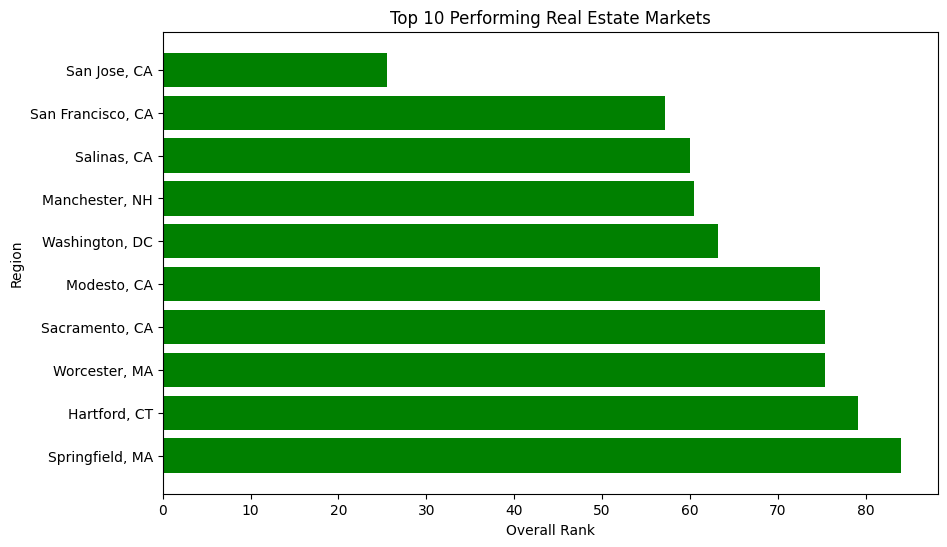

In [9]:

# Bar chart for overall rank
plt.figure(figsize=(10, 6))
plt.barh(top_markets['RegionName'], top_markets['Overall_Rank'], color='green')
plt.xlabel('Overall Rank')
plt.ylabel('Region')
plt.title('Top 10 Performing Real Estate Markets')
plt.gca().invert_yaxis()
plt.show()

### **Bar Chart: Top 10 Performing Real Estate Markets**

### **Why Lower Overall Rank Is Better**

- **Higher Performance Across Metrics**:  
  A lower overall rank means the market consistently excels in the evaluated areas:
  - **Price Growth (ZHVI)**
  - **Rental Returns (ZORI)**
  - **Competitiveness (Market Activity)**

- **Comparative Ranking**:  
  The system ranks markets relative to one another. For example:
  - A market with **Rank 1 for ZHVI**, **Rank 2 for ZORI**, and **Rank 1 for Market Activity** has an **average overall rank of 1.33**, making it highly competitive.
  - A market with **Rank 5, Rank 6, and Rank 7** has an **average overall rank of 6.0**, indicating lower performance compared to the first market.

---

### **Insight 1**
- **San Jose, CA**:  
  If it has the lowest overall rank, it likely performs exceptionally well in price appreciation and market activity, even if its rental yields are moderate.
  
- **Springfield, MA**:  
  If it has a higher overall rank, it might perform well in rental yields but less so in price appreciation or market activity.


### **Insight 2**:
- Markets like **San Jose, CA** and **San Francisco, CA** rank highly due to their strong price appreciation, despite relatively moderate rental yields.
- **Salinas, CA** and **Manchester, NH** offer a mix of competitive rental yields and moderate market activity, making them attractive for investors looking for balanced opportunities.


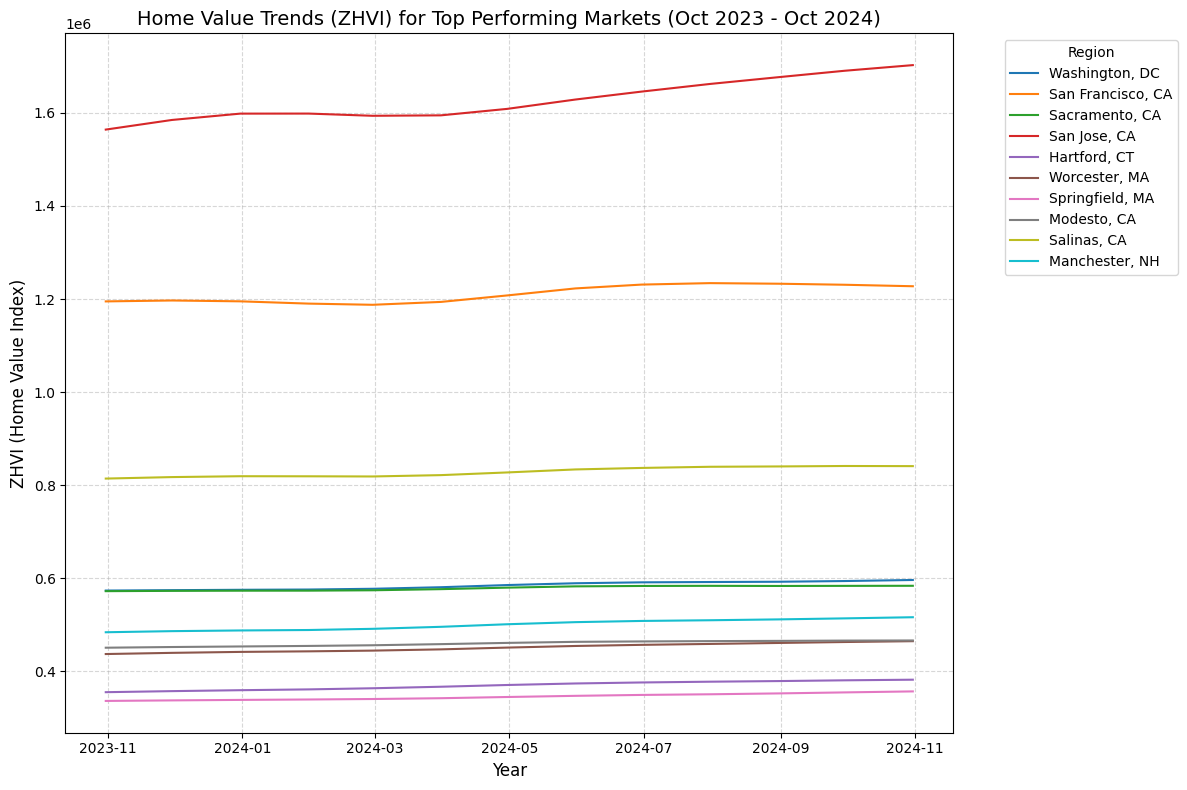

In [10]:
import matplotlib.pyplot as plt

# Extract trends for top market regions from zhvi
top_market_regions = top_markets['RegionName'].unique()
zhvi_trends = zhvi_data[zhvi_data['RegionName'].isin(top_market_regions)]

# Transpose data for plotting (columns as dates, rows as regions)
zhvi_trends = zhvi_trends.set_index('RegionName').drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1).T
zhvi_trends.index = pd.to_datetime(zhvi_trends.index)  # Convert dates to datetime for better plotting

# Filter for October 2023 to October 2024
start_date = "2023-10-01"
end_date = "2024-10-31"
zhvi_trends = zhvi_trends[(zhvi_trends.index >= start_date) & (zhvi_trends.index <= end_date)]

# Plot the trends
plt.figure(figsize=(12, 8))
for region in zhvi_trends.columns:
    plt.plot(zhvi_trends.index, zhvi_trends[region], label=region)

plt.title("Home Value Trends (ZHVI) for Top Performing Markets (Oct 2023 - Oct 2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("ZHVI (Home Value Index)", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()


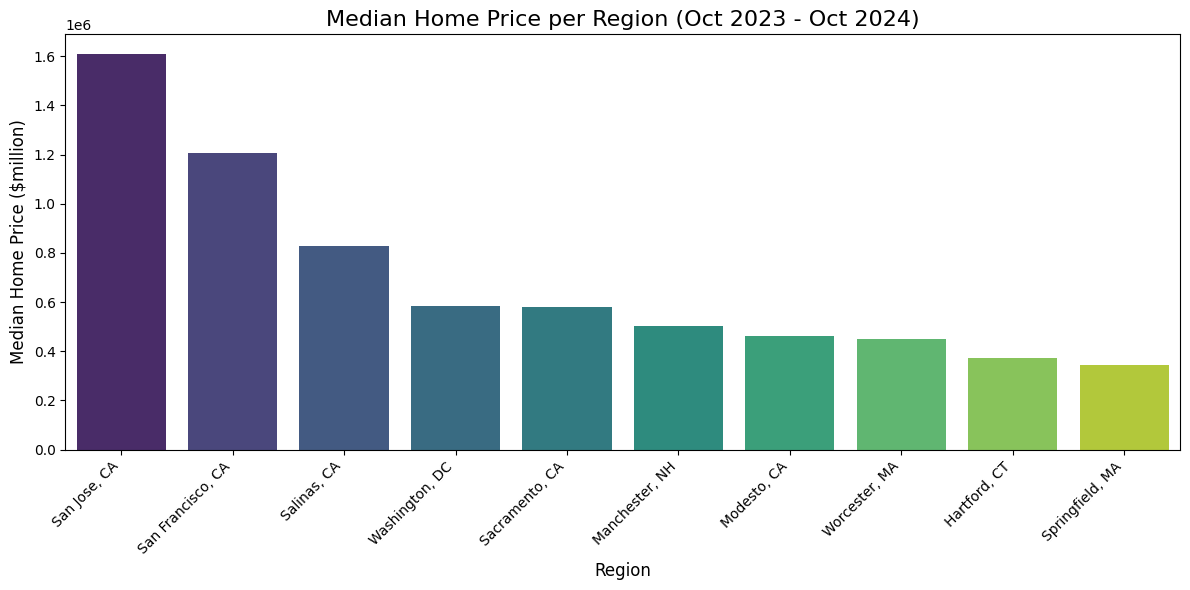

In [11]:
# Filter for October 2023 to October 2024
start_date = "2023-10-01"
end_date = "2024-10-31"
zhvi_trends = zhvi_trends[(zhvi_trends.index >= start_date) & (zhvi_trends.index <= end_date)]

# Calculate the median home price for each region in the date range
median_home_price = zhvi_trends.median().sort_values(ascending=False).reset_index()
median_home_price.columns = ["RegionName", "Median_ZHVI"]

# Plot the median home price per region as a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=median_home_price, x="RegionName", y="Median_ZHVI", hue="RegionName", dodge=False, palette="viridis")
plt.title("Median Home Price per Region (Oct 2023 - Oct 2024)", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Median Home Price ($million)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



### **Home Value Trends Visualization**

**Line Chart: Home Value Trends (ZHVI) for Top Performing Markets**

- **What It Shows**:  
  This chart tracks how home values (ZHVI) have changed over time in the top 10 real estate markets. Each line represents the average property value in a market, allowing us to compare their growth trends.

- **Key Insights**:
  1. **Fast-Growing Markets**:  
     Cities like *San Jose, CA* and *San Francisco, CA* show sharp increases in home values, indicating strong demand and rapid appreciation. These markets are great for investors who want to buy, upgrade, and sell quickly to maximize profits.
  2. **Steady Growers**:  
     Areas such as *Salinas, CA* and *Manchester, NH* have slower but consistent growth. These markets are better for long-term investments, as their steady increases suggest stability and lower risk.
  3. **Stable or Cooling Markets**:  
     Some regions with flatter lines might be reaching a peak or cooling off. While these areas may not offer as much price appreciation, they could still be profitable for rental income.

- **Why It Matters**:  
  - Steeper lines show markets where property values are growing rapidly, which can lead to higher profits if you sell soon.  
  - Gradual, steady growth suggests reliable markets where property values are less volatile, making them ideal for long-term investments.  
  - Flat trends indicate stable markets, which might still be good for renting out properties or holding for future appreciation.

- **How to Use This Information**:  
  - If you want quick profits, focus on markets with sharp growth like *San Jose* or *San Francisco*.  
  - For steady income and long-term value, look at consistent growers like *Salinas* or *Springfield*.  
  - The chart helps you decide if a market is still growing, stable, or slowing down, so you can plan your investment accordingly.


### **Conclusion for Question 1: Which US Real Estate Market is Doing Best Overall?**

Based on the analysis, the top-performing real estate markets are determined by their strong performance in price appreciation (ZHVI), rental yields (ZORI), and market activity (temperature index). Markets like **San Jose, CA** and **San Francisco, CA** rank highly due to their consistent price growth and competitive nature. However, regions such as **Salinas, CA** and **Manchester, NH** offer a balance of moderate price appreciation and high rental yields, making them attractive for long-term investments.

- **High Growth Markets**: *San Jose, CA* and *San Francisco, CA* excel in appreciation, ideal for flipping or short-term investments.
- **Balanced Growth and Rental Yield Markets**: *Salinas, CA* and *Springfield, MA* provide steady price growth and strong rental yields, making them favorable for long-term investments.

Overall, the best market depends on your investment strategy. If rapid price appreciation is the priority, focus on competitive markets with high demand. For consistent returns, target markets with a balance of moderate appreciation and strong rental yields.

---

# 2) Are the sale prices and inventory listing going up or down overall in the US? (**Cristian Zendejas**)
---

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

### Let's start with looking at the new listings throughout the year of 10/2023-10/2024.

In [24]:
df = pd.read_csv("./datasets/for_sale_new_listings_month.csv")
df.head(20)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,323256.0,376081.0,476117.0,509438.0,538099.0,...,248801.0,299401.0,346170.0,383882.0,414294.0,380284.0,356407.0,352692.0,323542.0,318289.0
1,394913,1,"New York, NY",msa,NY,14880.0,22651.0,22492.0,25714.0,25627.0,...,9154.0,10844.0,13074.0,14710.0,15427.0,13472.0,12436.0,10331.0,12037.0,11183.0
2,753899,2,"Los Angeles, CA",msa,CA,8136.0,9261.0,10164.0,10597.0,11556.0,...,5561.0,5894.0,6532.0,7771.0,8294.0,7839.0,7771.0,7372.0,7078.0,6775.0
3,394463,3,"Chicago, IL",msa,IL,8645.0,11908.0,17472.0,16696.0,16869.0,...,5677.0,8329.0,9163.0,10675.0,11589.0,10675.0,10319.0,9942.0,9113.0,8848.0
4,394514,4,"Dallas, TX",msa,TX,7389.0,7894.0,10535.0,11797.0,11995.0,...,6141.0,7975.0,9518.0,10336.0,10662.0,10144.0,9368.0,8795.0,7674.0,7952.0
5,394692,5,"Houston, TX",msa,TX,6335.0,6996.0,9981.0,10048.0,10446.0,...,5440.0,6859.0,7813.0,8549.0,8812.0,8649.0,6543.0,7725.0,6710.0,7042.0
6,395209,6,"Washington, DC",msa,VA,5023.0,6791.0,9830.0,11019.0,10581.0,...,3265.0,4550.0,5699.0,6696.0,7520.0,6408.0,5677.0,5396.0,5999.0,5404.0
7,394974,7,"Philadelphia, PA",msa,PA,5432.0,7048.0,8527.0,9727.0,10074.0,...,3572.0,4686.0,5439.0,6249.0,6835.0,6178.0,5685.0,5623.0,5636.0,5576.0
8,394856,8,"Miami, FL",msa,FL,12468.0,11433.0,12561.0,11157.0,10715.0,...,11183.0,11514.0,10513.0,10653.0,10077.0,9208.0,8955.0,9277.0,9033.0,8766.0
9,394347,9,"Atlanta, GA",msa,GA,6902.0,8117.0,10584.0,11018.0,11152.0,...,5751.0,7172.0,8054.0,8777.0,9169.0,8614.0,7851.0,7959.0,6863.0,7294.0


In [26]:
df.tail(20)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
902,394805,916,"Los Alamos, NM",msa,NM,24.0,23.0,22.0,36.0,40.0,...,19.0,14.0,15.0,30.0,29.0,27.0,31.0,27.0,39.0,35.0
903,786265,917,"West Point, MS",msa,MS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.0,10.0,9.0,9.0,12.0,10.0
904,394678,918,"Hereford, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,13.0,8.0,11.0,10.0,18.0,8.0,15.0,11.0,10.0,13.0
905,845168,919,"Pearsall, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
906,394330,920,"Andrews, TX",msa,TX,19.0,22.0,28.0,32.0,32.0,...,14.0,23.0,19.0,24.0,17.0,22.0,19.0,13.0,20.0,13.0
907,786253,921,"Brownsville, TN",msa,TN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.0,14.0,8.0,10.0,14.0,13.0,13.0,9.0
908,395112,922,"Spirit Lake, IA",msa,IA,37.0,47.0,76.0,56.0,88.0,...,21.0,33.0,42.0,42.0,50.0,41.0,40.0,59.0,36.0,35.0
909,394594,923,"Fitzgerald, GA",msa,GA,8.0,14.0,15.0,13.0,18.0,...,13.0,9.0,14.0,9.0,15.0,5.0,11.0,15.0,15.0,14.0
910,753927,924,"Winnemucca, NV",msa,NV,NaN,NaN,NaN,NaN,NaN,...,13.0,10.0,25.0,16.0,15.0,16.0,15.0,15.0,18.0,17.0
911,394841,925,"Maysville, KY",msa,KY,19.0,22.0,17.0,43.0,38.0,...,18.0,6.0,22.0,17.0,17.0,20.0,16.0,17.0,18.0,13.0


In [28]:
df.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2024-06-30    float64
2024-07-31    float64
2024-08-31    float64
2024-09-30    float64
2024-10-31    float64
Length: 87, dtype: object

In [30]:
start_date = '2018-01-31'
end_date = '2022-12-31'

df = df.drop(index=0).reset_index(drop=True)

date_columns = [col for col in df.columns if pd.to_datetime(col, errors='coerce', format='%Y-%m-%d', exact=True) is not pd.NaT]

columns_to_drop = [col for col in date_columns if start_date <= col <= end_date]
df = df.drop(columns=columns_to_drop)

df["RegionName"] = df["RegionName"].apply(lambda x: x.split(',')[0])
df.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,394913,1,New York,msa,NY,9754.0,10439.0,14598.0,13820.0,14360.0,...,9154.0,10844.0,13074.0,14710.0,15427.0,13472.0,12436.0,10331.0,12037.0,11183.0
1,753899,2,Los Angeles,msa,CA,4699.0,4988.0,6370.0,6156.0,6831.0,...,5561.0,5894.0,6532.0,7771.0,8294.0,7839.0,7771.0,7372.0,7078.0,6775.0
2,394463,3,Chicago,msa,IL,6043.0,7047.0,9530.0,9649.0,10865.0,...,5677.0,8329.0,9163.0,10675.0,11589.0,10675.0,10319.0,9942.0,9113.0,8848.0
3,394514,4,Dallas,msa,TX,5188.0,5291.0,8159.0,8879.0,9467.0,...,6141.0,7975.0,9518.0,10336.0,10662.0,10144.0,9368.0,8795.0,7674.0,7952.0
4,394692,5,Houston,msa,TX,5309.0,5567.0,7755.0,7305.0,7893.0,...,5440.0,6859.0,7813.0,8549.0,8812.0,8649.0,6543.0,7725.0,6710.0,7042.0
5,395209,6,Washington,msa,VA,3628.0,4096.0,6589.0,6329.0,6434.0,...,3265.0,4550.0,5699.0,6696.0,7520.0,6408.0,5677.0,5396.0,5999.0,5404.0
6,394974,7,Philadelphia,msa,PA,3981.0,4354.0,5888.0,5793.0,6090.0,...,3572.0,4686.0,5439.0,6249.0,6835.0,6178.0,5685.0,5623.0,5636.0,5576.0
7,394856,8,Miami,msa,FL,9175.0,8727.0,9678.0,8372.0,9086.0,...,11183.0,11514.0,10513.0,10653.0,10077.0,9208.0,8955.0,9277.0,9033.0,8766.0
8,394347,9,Atlanta,msa,GA,4895.0,5426.0,7249.0,6522.0,7427.0,...,5751.0,7172.0,8054.0,8777.0,9169.0,8614.0,7851.0,7959.0,6863.0,7294.0
9,394404,10,Boston,msa,MA,2416.0,2636.0,4458.0,4163.0,5062.0,...,2538.0,2993.0,3692.0,5024.0,5856.0,4788.0,3755.0,3143.0,4895.0,4016.0


In [32]:
df.count()

RegionID      921
SizeRank      921
RegionName    921
RegionType    921
StateName     921
2023-01-31    898
2023-02-28    902
2023-03-31    901
2023-04-30    901
2023-05-31    901
2023-06-30    902
2023-07-31    903
2023-08-31    902
2023-09-30    903
2023-10-31    903
2023-11-30    903
2023-12-31    903
2024-01-31    907
2024-02-29    908
2024-03-31    911
2024-04-30    913
2024-05-31    913
2024-06-30    915
2024-07-31    915
2024-08-31    915
2024-09-30    918
2024-10-31    921
dtype: int64

### Renaming some columns since the originals are a little lengthy and my changes on one column are different.

In [35]:
df = df.rename(columns={"SizeRank": "Rank", "RegionName": "City", "StateName": "State"})
df.head(10)

,RegionID,Rank,City,RegionType,State,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,394913,1,New York,msa,NY,9754.0,10439.0,14598.0,13820.0,14360.0,...,9154.0,10844.0,13074.0,14710.0,15427.0,13472.0,12436.0,10331.0,12037.0,11183.0
1,753899,2,Los Angeles,msa,CA,4699.0,4988.0,6370.0,6156.0,6831.0,...,5561.0,5894.0,6532.0,7771.0,8294.0,7839.0,7771.0,7372.0,7078.0,6775.0
2,394463,3,Chicago,msa,IL,6043.0,7047.0,9530.0,9649.0,10865.0,...,5677.0,8329.0,9163.0,10675.0,11589.0,10675.0,10319.0,9942.0,9113.0,8848.0
3,394514,4,Dallas,msa,TX,5188.0,5291.0,8159.0,8879.0,9467.0,...,6141.0,7975.0,9518.0,10336.0,10662.0,10144.0,9368.0,8795.0,7674.0,7952.0
4,394692,5,Houston,msa,TX,5309.0,5567.0,7755.0,7305.0,7893.0,...,5440.0,6859.0,7813.0,8549.0,8812.0,8649.0,6543.0,7725.0,6710.0,7042.0
5,395209,6,Washington,msa,VA,3628.0,4096.0,6589.0,6329.0,6434.0,...,3265.0,4550.0,5699.0,6696.0,7520.0,6408.0,5677.0,5396.0,5999.0,5404.0
6,394974,7,Philadelphia,msa,PA,3981.0,4354.0,5888.0,5793.0,6090.0,...,3572.0,4686.0,5439.0,6249.0,6835.0,6178.0,5685.0,5623.0,5636.0,5576.0
7,394856,8,Miami,msa,FL,9175.0,8727.0,9678.0,8372.0,9086.0,...,11183.0,11514.0,10513.0,10653.0,10077.0,9208.0,8955.0,9277.0,9033.0,8766.0
8,394347,9,Atlanta,msa,GA,4895.0,5426.0,7249.0,6522.0,7427.0,...,5751.0,7172.0,8054.0,8777.0,9169.0,8614.0,7851.0,7959.0,6863.0,7294.0
9,394404,10,Boston,msa,MA,2416.0,2636.0,4458.0,4163.0,5062.0,...,2538.0,2993.0,3692.0,5024.0,5856.0,4788.0,3755.0,3143.0,4895.0,4016.0


### Let's start seeing if there are any duplicates we need to remove.

In [38]:
df.shape

(921, 27)

In [40]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 27)


In [42]:
df.count()

RegionID      921
Rank          921
City          921
RegionType    921
State         921
2023-01-31    898
2023-02-28    902
2023-03-31    901
2023-04-30    901
2023-05-31    901
2023-06-30    902
2023-07-31    903
2023-08-31    902
2023-09-30    903
2023-10-31    903
2023-11-30    903
2023-12-31    903
2024-01-31    907
2024-02-29    908
2024-03-31    911
2024-04-30    913
2024-05-31    913
2024-06-30    915
2024-07-31    915
2024-08-31    915
2024-09-30    918
2024-10-31    921
dtype: int64

In [44]:
df = df.drop_duplicates()
df.count()

RegionID      921
Rank          921
City          921
RegionType    921
State         921
2023-01-31    898
2023-02-28    902
2023-03-31    901
2023-04-30    901
2023-05-31    901
2023-06-30    902
2023-07-31    903
2023-08-31    902
2023-09-30    903
2023-10-31    903
2023-11-30    903
2023-12-31    903
2024-01-31    907
2024-02-29    908
2024-03-31    911
2024-04-30    913
2024-05-31    913
2024-06-30    915
2024-07-31    915
2024-08-31    915
2024-09-30    918
2024-10-31    921
dtype: int64

### Now let's drop null or NaN values.

In [47]:
print(df.isnull().sum())

RegionID       0
Rank           0
City           0
RegionType     0
State          0
2023-01-31    23
2023-02-28    19
2023-03-31    20
2023-04-30    20
2023-05-31    20
2023-06-30    19
2023-07-31    18
2023-08-31    19
2023-09-30    18
2023-10-31    18
2023-11-30    18
2023-12-31    18
2024-01-31    14
2024-02-29    13
2024-03-31    10
2024-04-30     8
2024-05-31     8
2024-06-30     6
2024-07-31     6
2024-08-31     6
2024-09-30     3
2024-10-31     0
dtype: int64


In [49]:
df = df.dropna()
df.count()

RegionID      887
Rank          887
City          887
RegionType    887
State         887
2023-01-31    887
2023-02-28    887
2023-03-31    887
2023-04-30    887
2023-05-31    887
2023-06-30    887
2023-07-31    887
2023-08-31    887
2023-09-30    887
2023-10-31    887
2023-11-30    887
2023-12-31    887
2024-01-31    887
2024-02-29    887
2024-03-31    887
2024-04-30    887
2024-05-31    887
2024-06-30    887
2024-07-31    887
2024-08-31    887
2024-09-30    887
2024-10-31    887
dtype: int64

In [51]:
print(df.isnull().sum())

RegionID      0
Rank          0
City          0
RegionType    0
State         0
2023-01-31    0
2023-02-28    0
2023-03-31    0
2023-04-30    0
2023-05-31    0
2023-06-30    0
2023-07-31    0
2023-08-31    0
2023-09-30    0
2023-10-31    0
2023-11-30    0
2023-12-31    0
2024-01-31    0
2024-02-29    0
2024-03-31    0
2024-04-30    0
2024-05-31    0
2024-06-30    0
2024-07-31    0
2024-08-31    0
2024-09-30    0
2024-10-31    0
dtype: int64


In [53]:
df.head(5)

,RegionID,Rank,City,RegionType,State,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,394913,1,New York,msa,NY,9754.0,10439.0,14598.0,13820.0,14360.0,...,9154.0,10844.0,13074.0,14710.0,15427.0,13472.0,12436.0,10331.0,12037.0,11183.0
1,753899,2,Los Angeles,msa,CA,4699.0,4988.0,6370.0,6156.0,6831.0,...,5561.0,5894.0,6532.0,7771.0,8294.0,7839.0,7771.0,7372.0,7078.0,6775.0
2,394463,3,Chicago,msa,IL,6043.0,7047.0,9530.0,9649.0,10865.0,...,5677.0,8329.0,9163.0,10675.0,11589.0,10675.0,10319.0,9942.0,9113.0,8848.0
3,394514,4,Dallas,msa,TX,5188.0,5291.0,8159.0,8879.0,9467.0,...,6141.0,7975.0,9518.0,10336.0,10662.0,10144.0,9368.0,8795.0,7674.0,7952.0
4,394692,5,Houston,msa,TX,5309.0,5567.0,7755.0,7305.0,7893.0,...,5440.0,6859.0,7813.0,8549.0,8812.0,8649.0,6543.0,7725.0,6710.0,7042.0


### Now let's look for any outliers in the date columns.

<Axes: xlabel='2023-09-30'>

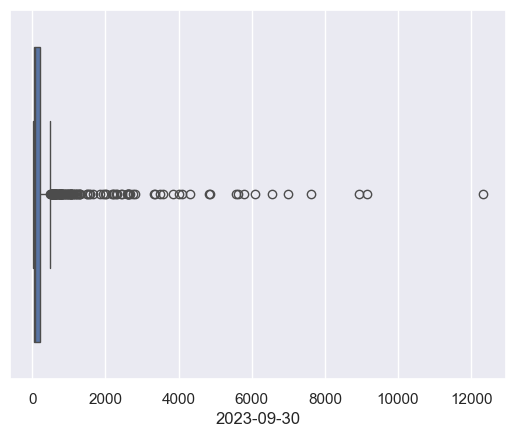

In [56]:
sns.boxplot(x=df['2023-09-30'])

<Axes: xlabel='2023-10-31'>

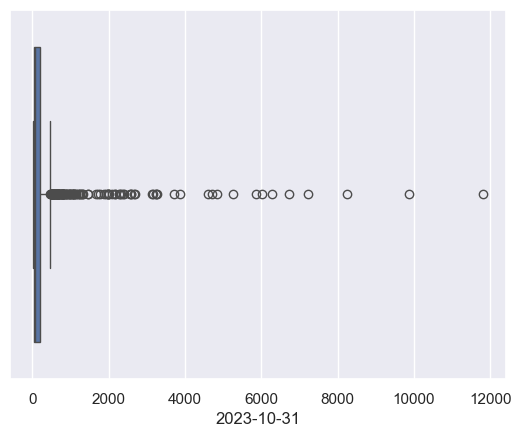

In [58]:
sns.boxplot(x=df['2023-10-31'])

<Axes: xlabel='2023-11-30'>

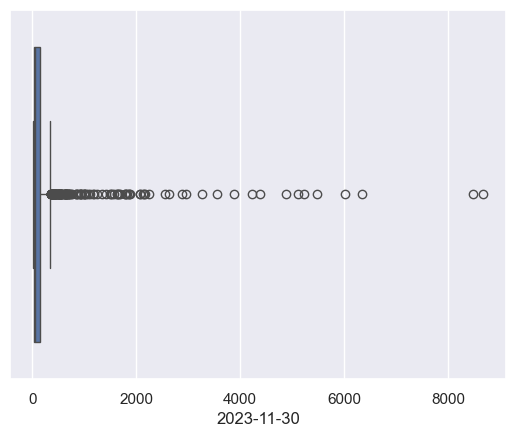

In [60]:
sns.boxplot(x=df['2023-11-30'])

<Axes: xlabel='2023-12-31'>

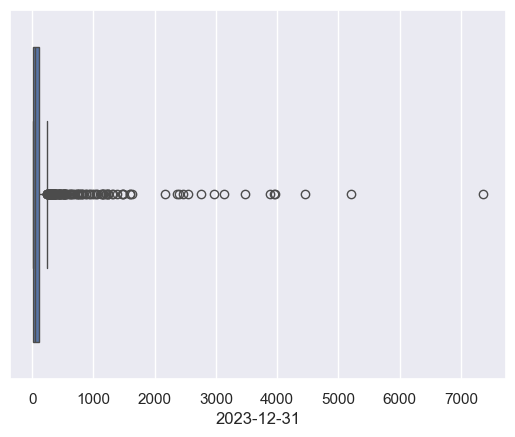

In [62]:
sns.boxplot(x=df['2023-12-31'])

<Axes: xlabel='2024-01-31'>

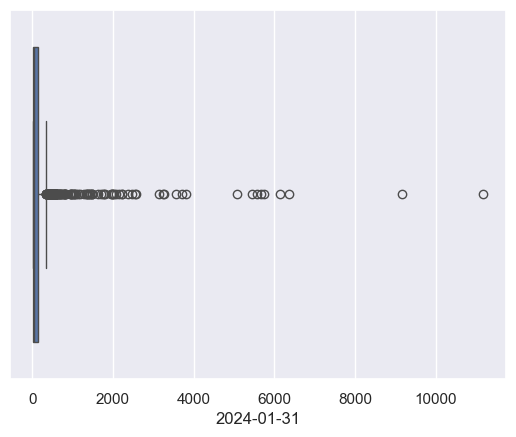

In [64]:
sns.boxplot(x=df['2024-01-31'])

<Axes: xlabel='2024-02-29'>

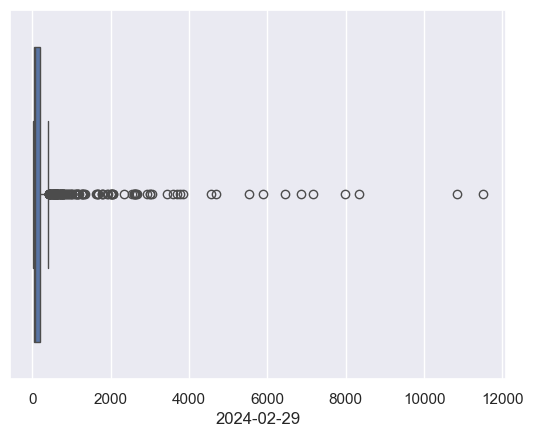

In [66]:
sns.boxplot(x=df['2024-02-29'])

<Axes: xlabel='2024-03-31'>

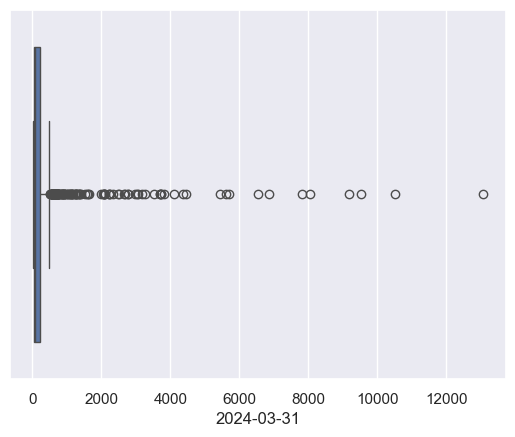

In [68]:
sns.boxplot(x=df['2024-03-31'])

<Axes: xlabel='2024-04-30'>

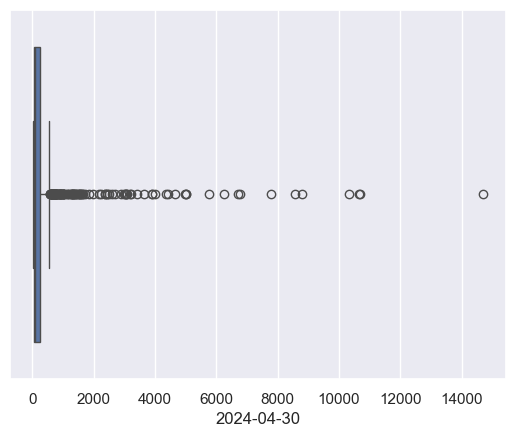

In [70]:
sns.boxplot(x=df['2024-04-30'])

<Axes: xlabel='2024-05-31'>

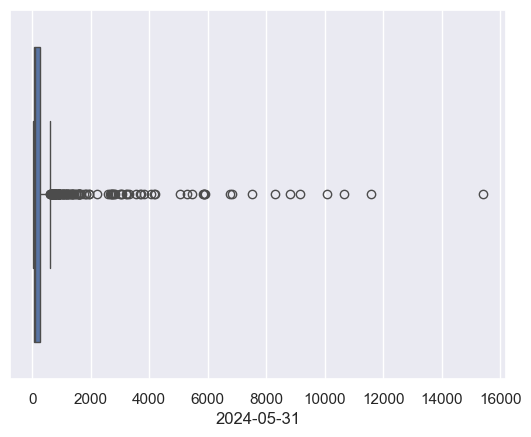

In [72]:
sns.boxplot(x=df['2024-05-31'])

<Axes: xlabel='2024-06-30'>

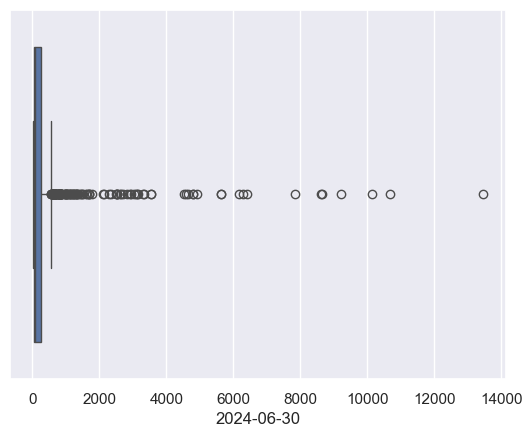

In [74]:
sns.boxplot(x=df['2024-06-30'])

<Axes: xlabel='2024-07-31'>

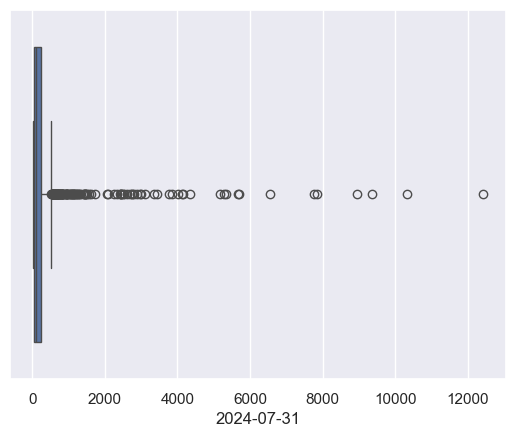

In [76]:
sns.boxplot(x=df['2024-07-31'])

<Axes: xlabel='2024-08-31'>

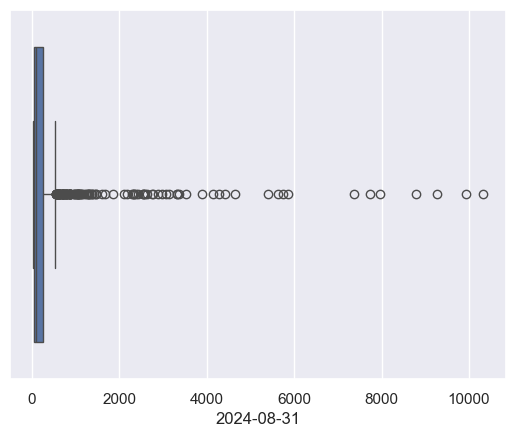

In [78]:
sns.boxplot(x=df['2024-08-31'])

<Axes: xlabel='2024-09-30'>

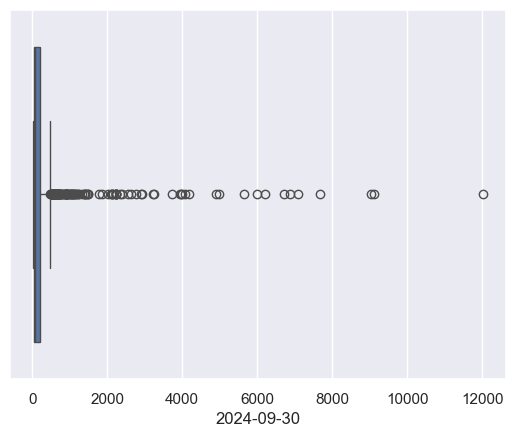

In [80]:
sns.boxplot(x=df['2024-09-30'])

<Axes: xlabel='2024-10-31'>

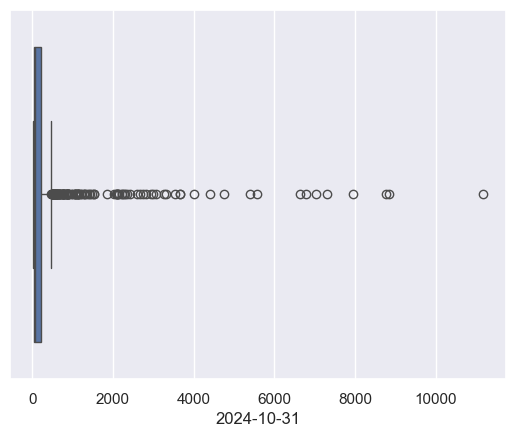

In [82]:
sns.boxplot(x=df['2024-10-31'])

### Looking at all the charts for the date columns I'm seeing very little variation around the median for the data. It looks like a lot of the values were considered outliers, but if everything is an outlier than I'm assuming nothing is. For this reason, I'm not removing any of the data that is considered outliers.

In [85]:
date_columns = [col for col in df.columns if pd.to_datetime(col, errors='coerce', format='%Y-%m-%d', exact=True) is not pd.NaT]

date_df = df[date_columns]
Q1 = date_df.quantile(0.25)
Q3 = date_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2023-01-31    122.5
2023-02-28    129.0
2023-03-31    183.5
2023-04-30    193.5
2023-05-31    201.5
2023-06-30    207.0
2023-07-31    182.5
2023-08-31    191.0
2023-09-30    179.0
2023-10-31    169.0
2023-11-30    128.0
2023-12-31     86.5
2024-01-31    123.5
2024-02-29    153.0
2024-03-31    182.0
2024-04-30    209.5
2024-05-31    223.0
2024-06-30    205.5
2024-07-31    193.0
2024-08-31    197.0
2024-09-30    170.5
2024-10-31    168.0
dtype: float64


### Let's look at the total listings for each state by year 2024 vs 2023.

#### As mentioned above I'll only use the months of January-October for both years.

In [89]:
drop_nov_dec = ['2023-11-30', '2023-12-31']
df = df.drop(columns=drop_nov_dec)

In [91]:
dates_2023 = [col for col in df.columns if col.startswith('2023')]
dates_2024 = [col for col in df.columns if col.startswith('2024')]

df['TotalListings_2023'] = df[dates_2023].sum(axis=1)
df['TotalListings_2024'] = df[dates_2024].sum(axis=1)

state_totals_2023 = df.groupby('State')['TotalListings_2023'].sum()
state_totals_2024 = df.groupby('State')['TotalListings_2024'].sum()

state_totals_comparison = pd.DataFrame({
    '2023 Listings': state_totals_2023,
    '2024 Listings': state_totals_2024
}).sort_values(by='2023 Listings', ascending=False)

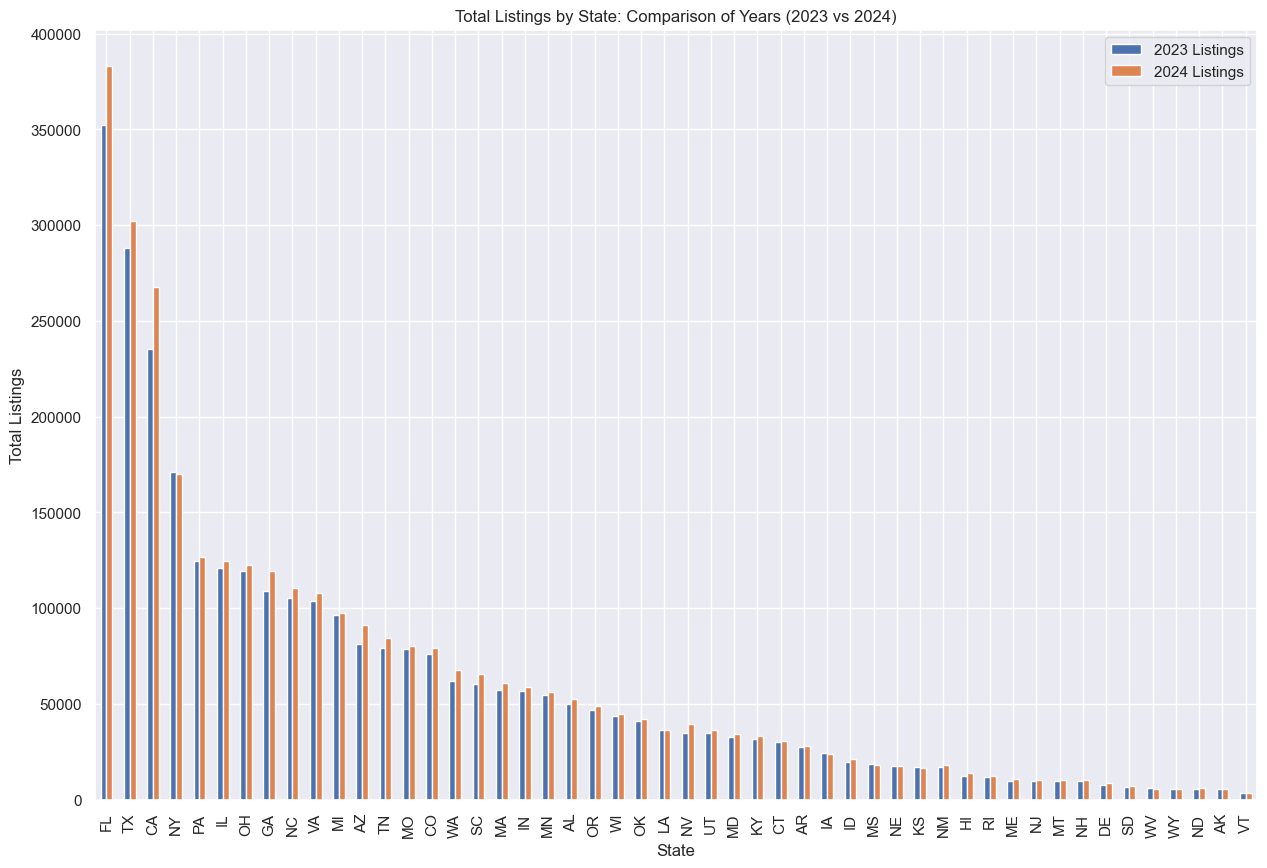

In [93]:
state_totals_comparison.plot(kind='bar', figsize=(15,10))
plt.title("Total Listings by State: Comparison of Years (2023 vs 2024)")
plt.xlabel('State')
plt.ylabel("Total Listings")
plt.show()

#### Florida seems to be a clear winner in terms of listings each year having the most both years.

### Now let's look at the total listings by month compared by years.

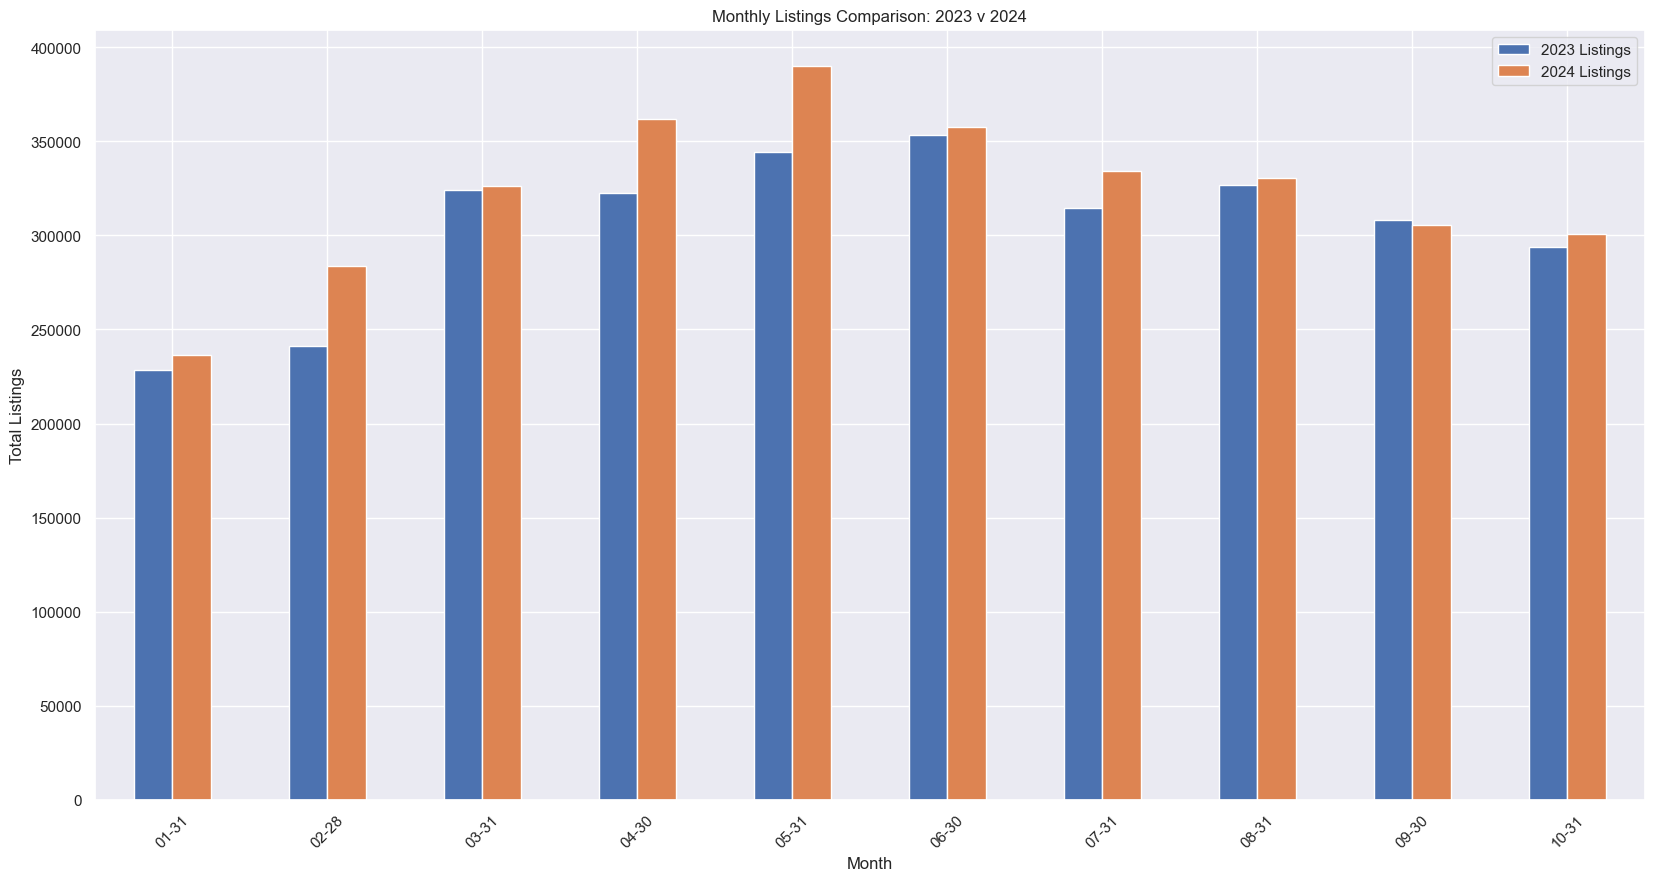

In [97]:
monthly_totals_2023 = df[dates_2023].sum()
monthly_totals_2024 = df[dates_2024].sum()

comparison_df = pd.DataFrame({
    'Month': monthly_totals_2023.index.str.slice(5),
    '2023 Listings': monthly_totals_2023.values,
    '2024 Listings': monthly_totals_2024.values,
})

comparison_df.plot(x='Month', kind='bar', figsize=(20,10))
plt.title("Monthly Listings Comparison: 2023 v 2024")
plt.xlabel("Month")
plt.ylabel("Total Listings")
plt.xticks(rotation=45)
plt.show()

#### We can definitely see that 2024 overall had more listings than 2023. The peak of 2024 was in May while in 2023 it was June.

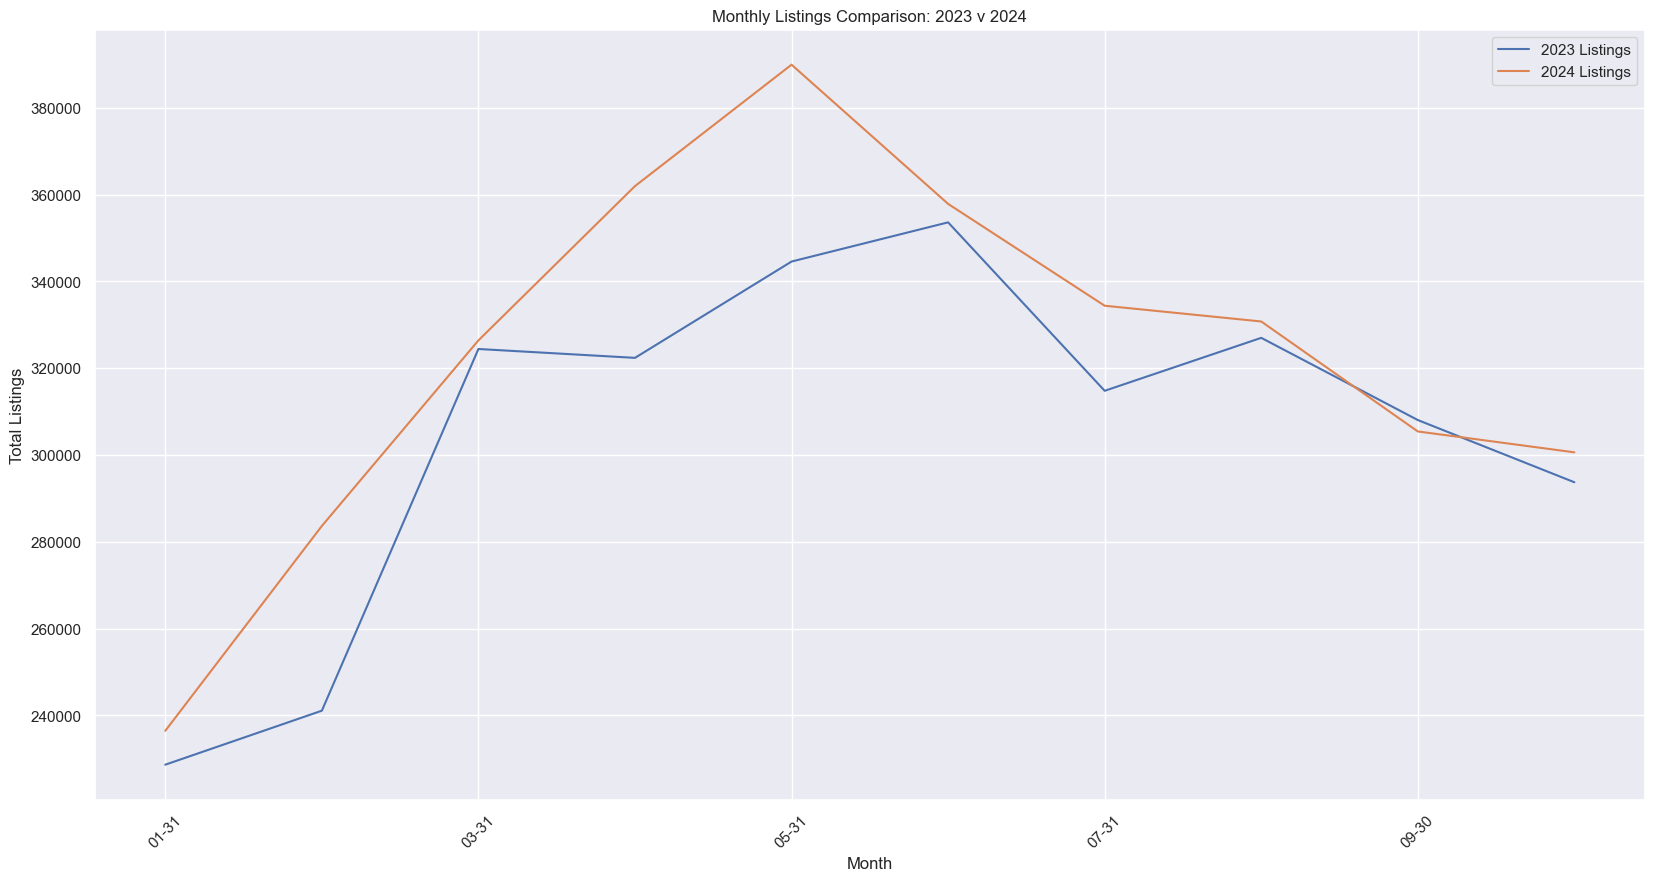

In [100]:
comparison_df.plot(x='Month', kind='line', figsize=(20,10))
plt.title("Monthly Listings Comparison: 2023 v 2024")
plt.xlabel("Month")
plt.ylabel("Total Listings")
plt.xticks(rotation=45)
plt.show()

#### When comparing the years for the same months January - October, we see that overall 2024 has had more listings most of the year then 2023. The listings peaked in May of 2024 and as we approached the winter months, they have steadily declined. Overall it looks like listings are going down now that we are past the summer months.

### Now let's take a look at the listing sale prices and see if they have been increasing in 2024 vs 2023.

In [104]:
price_df = pd.read_csv("./datasets/Median_list_price_month.csv")
price_df.head(20)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,255000.0,264900.0,269900.0,279000.0,281000.0,...,379000.0,385000.0,394000.0,399900.0,407900.0,409900.0,400000.0,399900.0,399900.0,399000.0
1,394913,1,"New York, NY",msa,NY,489000.0,505000.0,515000.0,519000.0,529900.0,...,685000.0,699000.0,699000.0,700000.0,719999.0,719000.0,709000.0,699990.0,719900.0,725000.0
2,753899,2,"Los Angeles, CA",msa,CA,709000.0,725000.0,730000.0,750000.0,750000.0,...,988000.0,999000.0,999900.0,1049000.0,1089000.0,1099000.0,1098000.0,1074950.0,1060000.0,1050000.0
3,394463,3,"Chicago, IL",msa,IL,269900.0,289000.0,294900.0,299900.0,307000.0,...,320000.0,330000.0,339900.0,350000.0,359900.0,359900.0,355000.0,349900.0,350000.0,340000.0
4,394514,4,"Dallas, TX",msa,TX,318000.0,325000.0,325990.0,334500.0,334900.0,...,410000.0,415000.0,424900.0,434000.0,439900.0,440000.0,435000.0,429000.0,428595.0,425000.0
5,394692,5,"Houston, TX",msa,TX,289500.0,294900.0,299000.0,299900.0,299999.0,...,349950.0,350000.0,359000.0,365000.0,367000.0,365000.0,365999.0,365000.0,359900.0,355000.0
6,395209,6,"Washington, DC",msa,VA,392000.0,400000.0,424900.0,435000.0,439900.0,...,530000.0,549900.0,575000.0,598250.0,599000.0,595000.0,579000.0,565000.0,575000.0,570000.0
7,394974,7,"Philadelphia, PA",msa,PA,219000.0,225000.0,232500.0,244900.0,250000.0,...,300000.0,315000.0,325000.0,346200.0,359000.0,364900.0,355000.0,350000.0,350000.0,349900.0
8,394856,8,"Miami, FL",msa,FL,364900.0,365900.0,369000.0,369900.0,374300.0,...,535000.0,529000.0,525000.0,520000.0,520000.0,520000.0,515000.0,514900.0,510000.0,509450.0
9,394347,9,"Atlanta, GA",msa,GA,272000.0,279900.0,289900.0,299900.0,300000.0,...,374900.0,375000.0,380000.0,389000.0,399000.0,398988.0,395000.0,390000.0,389500.0,389000.0


In [106]:
price_df.tail(20)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
908,845168,919,"Pearsall, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,225000.0,215000.0,234667.0,200000.0,227225.0,230000.0,235000.0,230000.0,251300.0,257000.0
909,394330,920,"Andrews, TX",msa,TX,220000.0,215750.0,214000.0,228000.0,240000.0,...,257000.0,294000.0,282500.0,290500.0,293000.0,275500.0,264000.0,284950.0,327000.0,302450.0
910,786253,921,"Brownsville, TN",msa,TN,NaN,NaN,NaN,NaN,NaN,...,234000.0,234000.0,229950.0,236950.0,220950.0,205950.0,199900.0,197450.0,222500.0,248450.0
911,395112,922,"Spirit Lake, IA",msa,IA,249000.0,258500.0,271900.0,289900.0,289900.0,...,441950.0,424900.0,414900.0,424500.0,459900.0,459900.0,459900.0,577000.0,549900.0,544900.0
912,394594,923,"Fitzgerald, GA",msa,GA,100000.0,89999.0,89900.0,94500.0,94500.0,...,162500.0,166750.0,166750.0,167000.0,165000.0,165000.0,185000.0,194900.0,189900.0,179900.0
913,753927,924,"Winnemucca, NV",msa,NV,210000.0,210000.0,214000.0,218000.0,215000.0,...,339800.0,339800.0,369900.0,369900.0,345000.0,359999.0,369900.0,347500.0,369900.0,369900.0
914,394841,925,"Maysville, KY",msa,KY,127500.0,126450.0,132000.0,129950.0,132000.0,...,164900.0,195000.0,200000.0,204500.0,194750.0,194900.0,194900.0,218950.0,229000.0,214500.0
915,395104,926,"Snyder, TX",msa,TX,139950.0,133000.0,129900.0,138000.0,139000.0,...,152450.0,142000.0,165000.0,142000.0,165000.0,190000.0,184000.0,149450.0,159500.0,162000.0
916,394676,927,"Helena, AR",msa,AR,NaN,NaN,NaN,NaN,NaN,...,119000.0,89250.0,142450.0,129900.0,127450.0,140500.0,165000.0,141000.0,133000.0,125500.0
917,395111,928,"Spencer, IA",msa,IA,144500.0,141250.0,152400.0,149900.0,154900.0,...,215000.0,234900.0,234000.0,218000.0,225000.0,219000.0,217250.0,192250.0,183750.0,186250.0


#### The data is very similar to the new listings data, so we'll remove the first row and only use the 2023 & 2024 years again to compare the same months.

In [109]:
price_start_date = '2018-01-31'
price_end_date = '2022-12-31'

price_df = price_df.drop(index=0).reset_index(drop=True)

price_date_columns = [col for col in price_df.columns if pd.to_datetime(col, errors='coerce', format='%Y-%m-%d', exact=True) is not pd.NaT]

columns_to_drop = [col for col in price_date_columns if price_start_date <= col <= price_end_date]
price_df = price_df.drop(columns=columns_to_drop)

price_df["RegionName"] = price_df["RegionName"].apply(lambda x: x.split(',')[0])
price_df.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,394913,1,New York,msa,NY,620000.0,635000.0,649900.0,659000.0,679000.0,...,685000.0,699000.0,699000.0,700000.0,719999.0,719000.0,709000.0,699990.0,719900.0,725000.0
1,753899,2,Los Angeles,msa,CA,879900.0,899000.0,900000.0,949000.0,979000.0,...,988000.0,999000.0,999900.0,1049000.0,1089000.0,1099000.0,1098000.0,1074950.0,1060000.0,1050000.0
2,394463,3,Chicago,msa,IL,299000.0,308500.0,319000.0,329900.0,339600.0,...,320000.0,330000.0,339900.0,350000.0,359900.0,359900.0,355000.0,349900.0,350000.0,340000.0
3,394514,4,Dallas,msa,TX,395000.0,396000.0,409450.0,429990.0,440000.0,...,410000.0,415000.0,424900.0,434000.0,439900.0,440000.0,435000.0,429000.0,428595.0,425000.0
4,394692,5,Houston,msa,TX,340000.0,344900.0,349900.0,359900.0,365000.0,...,349950.0,350000.0,359000.0,365000.0,367000.0,365000.0,365999.0,365000.0,359900.0,355000.0
5,395209,6,Washington,msa,VA,499900.0,519900.0,550000.0,559990.0,569900.0,...,530000.0,549900.0,575000.0,598250.0,599000.0,595000.0,579000.0,565000.0,575000.0,570000.0
6,394974,7,Philadelphia,msa,PA,290000.0,295000.0,299999.0,315000.0,324900.0,...,300000.0,315000.0,325000.0,346200.0,359000.0,364900.0,355000.0,350000.0,350000.0,349900.0
7,394856,8,Miami,msa,FL,539000.0,539900.0,545000.0,550000.0,550000.0,...,535000.0,529000.0,525000.0,520000.0,520000.0,520000.0,515000.0,514900.0,510000.0,509450.0
8,394347,9,Atlanta,msa,GA,355000.0,359900.0,369900.0,379900.0,390000.0,...,374900.0,375000.0,380000.0,389000.0,399000.0,398988.0,395000.0,390000.0,389500.0,389000.0
9,394404,10,Boston,msa,MA,700000.0,739450.0,749900.0,759000.0,789000.0,...,739900.0,755000.0,775000.0,789900.0,799000.0,779000.0,769000.0,749900.0,769000.0,759900.0


In [111]:
price_df.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
2023-01-31    float64
2023-02-28    float64
2023-03-31    float64
2023-04-30    float64
2023-05-31    float64
2023-06-30    float64
2023-07-31    float64
2023-08-31    float64
2023-09-30    float64
2023-10-31    float64
2023-11-30    float64
2023-12-31    float64
2024-01-31    float64
2024-02-29    float64
2024-03-31    float64
2024-04-30    float64
2024-05-31    float64
2024-06-30    float64
2024-07-31    float64
2024-08-31    float64
2024-09-30    float64
2024-10-31    float64
dtype: object

In [113]:
price_df.count()

RegionID      927
SizeRank      927
RegionName    927
RegionType    927
StateName     927
2023-01-31    919
2023-02-28    921
2023-03-31    915
2023-04-30    920
2023-05-31    920
2023-06-30    919
2023-07-31    919
2023-08-31    922
2023-09-30    922
2023-10-31    924
2023-11-30    923
2023-12-31    922
2024-01-31    923
2024-02-29    923
2024-03-31    924
2024-04-30    922
2024-05-31    926
2024-06-30    926
2024-07-31    927
2024-08-31    927
2024-09-30    926
2024-10-31    926
dtype: int64

### Just like before we'll rename the columns.

In [116]:
price_df = price_df.rename(columns={"SizeRank": "Rank", "RegionName": "City", "StateName": "State"})
price_df.head(10)

,RegionID,Rank,City,RegionType,State,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,394913,1,New York,msa,NY,620000.0,635000.0,649900.0,659000.0,679000.0,...,685000.0,699000.0,699000.0,700000.0,719999.0,719000.0,709000.0,699990.0,719900.0,725000.0
1,753899,2,Los Angeles,msa,CA,879900.0,899000.0,900000.0,949000.0,979000.0,...,988000.0,999000.0,999900.0,1049000.0,1089000.0,1099000.0,1098000.0,1074950.0,1060000.0,1050000.0
2,394463,3,Chicago,msa,IL,299000.0,308500.0,319000.0,329900.0,339600.0,...,320000.0,330000.0,339900.0,350000.0,359900.0,359900.0,355000.0,349900.0,350000.0,340000.0
3,394514,4,Dallas,msa,TX,395000.0,396000.0,409450.0,429990.0,440000.0,...,410000.0,415000.0,424900.0,434000.0,439900.0,440000.0,435000.0,429000.0,428595.0,425000.0
4,394692,5,Houston,msa,TX,340000.0,344900.0,349900.0,359900.0,365000.0,...,349950.0,350000.0,359000.0,365000.0,367000.0,365000.0,365999.0,365000.0,359900.0,355000.0
5,395209,6,Washington,msa,VA,499900.0,519900.0,550000.0,559990.0,569900.0,...,530000.0,549900.0,575000.0,598250.0,599000.0,595000.0,579000.0,565000.0,575000.0,570000.0
6,394974,7,Philadelphia,msa,PA,290000.0,295000.0,299999.0,315000.0,324900.0,...,300000.0,315000.0,325000.0,346200.0,359000.0,364900.0,355000.0,350000.0,350000.0,349900.0
7,394856,8,Miami,msa,FL,539000.0,539900.0,545000.0,550000.0,550000.0,...,535000.0,529000.0,525000.0,520000.0,520000.0,520000.0,515000.0,514900.0,510000.0,509450.0
8,394347,9,Atlanta,msa,GA,355000.0,359900.0,369900.0,379900.0,390000.0,...,374900.0,375000.0,380000.0,389000.0,399000.0,398988.0,395000.0,390000.0,389500.0,389000.0
9,394404,10,Boston,msa,MA,700000.0,739450.0,749900.0,759000.0,789000.0,...,739900.0,755000.0,775000.0,789900.0,799000.0,779000.0,769000.0,749900.0,769000.0,759900.0


In [118]:
price_df.shape

(927, 27)

In [120]:
duplicate_rows_df = price_df[price_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 27)


In [122]:
price_df.count()

RegionID      927
Rank          927
City          927
RegionType    927
State         927
2023-01-31    919
2023-02-28    921
2023-03-31    915
2023-04-30    920
2023-05-31    920
2023-06-30    919
2023-07-31    919
2023-08-31    922
2023-09-30    922
2023-10-31    924
2023-11-30    923
2023-12-31    922
2024-01-31    923
2024-02-29    923
2024-03-31    924
2024-04-30    922
2024-05-31    926
2024-06-30    926
2024-07-31    927
2024-08-31    927
2024-09-30    926
2024-10-31    926
dtype: int64

In [124]:
price_df = price_df.drop_duplicates()
price_df.head(10)

,RegionID,Rank,City,RegionType,State,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,394913,1,New York,msa,NY,620000.0,635000.0,649900.0,659000.0,679000.0,...,685000.0,699000.0,699000.0,700000.0,719999.0,719000.0,709000.0,699990.0,719900.0,725000.0
1,753899,2,Los Angeles,msa,CA,879900.0,899000.0,900000.0,949000.0,979000.0,...,988000.0,999000.0,999900.0,1049000.0,1089000.0,1099000.0,1098000.0,1074950.0,1060000.0,1050000.0
2,394463,3,Chicago,msa,IL,299000.0,308500.0,319000.0,329900.0,339600.0,...,320000.0,330000.0,339900.0,350000.0,359900.0,359900.0,355000.0,349900.0,350000.0,340000.0
3,394514,4,Dallas,msa,TX,395000.0,396000.0,409450.0,429990.0,440000.0,...,410000.0,415000.0,424900.0,434000.0,439900.0,440000.0,435000.0,429000.0,428595.0,425000.0
4,394692,5,Houston,msa,TX,340000.0,344900.0,349900.0,359900.0,365000.0,...,349950.0,350000.0,359000.0,365000.0,367000.0,365000.0,365999.0,365000.0,359900.0,355000.0
5,395209,6,Washington,msa,VA,499900.0,519900.0,550000.0,559990.0,569900.0,...,530000.0,549900.0,575000.0,598250.0,599000.0,595000.0,579000.0,565000.0,575000.0,570000.0
6,394974,7,Philadelphia,msa,PA,290000.0,295000.0,299999.0,315000.0,324900.0,...,300000.0,315000.0,325000.0,346200.0,359000.0,364900.0,355000.0,350000.0,350000.0,349900.0
7,394856,8,Miami,msa,FL,539000.0,539900.0,545000.0,550000.0,550000.0,...,535000.0,529000.0,525000.0,520000.0,520000.0,520000.0,515000.0,514900.0,510000.0,509450.0
8,394347,9,Atlanta,msa,GA,355000.0,359900.0,369900.0,379900.0,390000.0,...,374900.0,375000.0,380000.0,389000.0,399000.0,398988.0,395000.0,390000.0,389500.0,389000.0
9,394404,10,Boston,msa,MA,700000.0,739450.0,749900.0,759000.0,789000.0,...,739900.0,755000.0,775000.0,789900.0,799000.0,779000.0,769000.0,749900.0,769000.0,759900.0


In [126]:
price_df.count()

RegionID      927
Rank          927
City          927
RegionType    927
State         927
2023-01-31    919
2023-02-28    921
2023-03-31    915
2023-04-30    920
2023-05-31    920
2023-06-30    919
2023-07-31    919
2023-08-31    922
2023-09-30    922
2023-10-31    924
2023-11-30    923
2023-12-31    922
2024-01-31    923
2024-02-29    923
2024-03-31    924
2024-04-30    922
2024-05-31    926
2024-06-30    926
2024-07-31    927
2024-08-31    927
2024-09-30    926
2024-10-31    926
dtype: int64

### Removing any null data and NaN types.

In [129]:
print(price_df.isnull().sum())

RegionID       0
Rank           0
City           0
RegionType     0
State          0
2023-01-31     8
2023-02-28     6
2023-03-31    12
2023-04-30     7
2023-05-31     7
2023-06-30     8
2023-07-31     8
2023-08-31     5
2023-09-30     5
2023-10-31     3
2023-11-30     4
2023-12-31     5
2024-01-31     4
2024-02-29     4
2024-03-31     3
2024-04-30     5
2024-05-31     1
2024-06-30     1
2024-07-31     0
2024-08-31     0
2024-09-30     1
2024-10-31     1
dtype: int64


In [131]:
price_df = price_df.dropna()
price_df.count()

RegionID      890
Rank          890
City          890
RegionType    890
State         890
2023-01-31    890
2023-02-28    890
2023-03-31    890
2023-04-30    890
2023-05-31    890
2023-06-30    890
2023-07-31    890
2023-08-31    890
2023-09-30    890
2023-10-31    890
2023-11-30    890
2023-12-31    890
2024-01-31    890
2024-02-29    890
2024-03-31    890
2024-04-30    890
2024-05-31    890
2024-06-30    890
2024-07-31    890
2024-08-31    890
2024-09-30    890
2024-10-31    890
dtype: int64

In [133]:
print(price_df.isnull().sum())

RegionID      0
Rank          0
City          0
RegionType    0
State         0
2023-01-31    0
2023-02-28    0
2023-03-31    0
2023-04-30    0
2023-05-31    0
2023-06-30    0
2023-07-31    0
2023-08-31    0
2023-09-30    0
2023-10-31    0
2023-11-30    0
2023-12-31    0
2024-01-31    0
2024-02-29    0
2024-03-31    0
2024-04-30    0
2024-05-31    0
2024-06-30    0
2024-07-31    0
2024-08-31    0
2024-09-30    0
2024-10-31    0
dtype: int64


### Checking for outliers.

<Axes: xlabel='2023-01-31'>

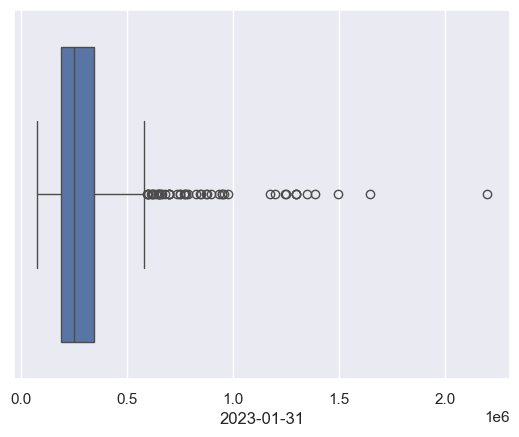

In [136]:
sns.boxplot(x=price_df['2023-01-31'])

<Axes: xlabel='2023-05-31'>

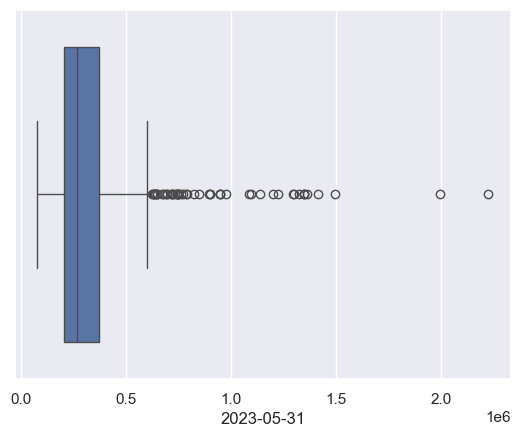

In [138]:
sns.boxplot(x=price_df['2023-05-31'])

<Axes: xlabel='2024-01-31'>

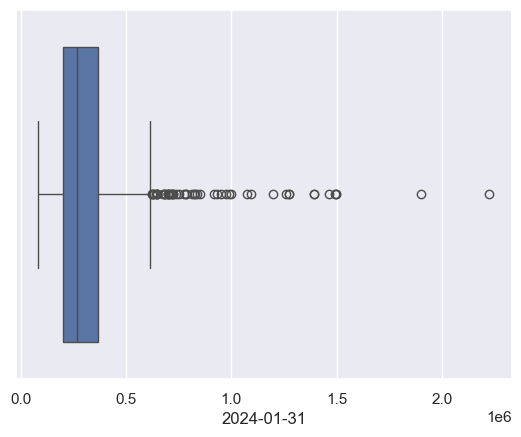

In [140]:
sns.boxplot(x=price_df['2024-01-31'])

<Axes: xlabel='2024-05-31'>

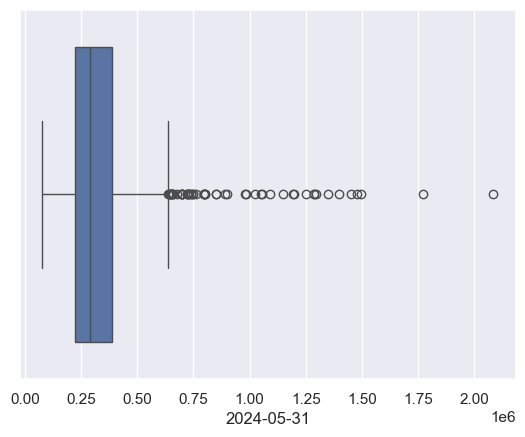

In [142]:
sns.boxplot(x=price_df['2024-05-31'])

In [143]:
price_date_columns = [col for col in price_df.columns if pd.to_datetime(col, errors='coerce', format='%Y-%m-%d', exact=True) is not pd.NaT]

price_date_df = price_df[price_date_columns]
Q1 = price_date_df.quantile(0.25)
Q3 = price_date_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2023-01-31    158862.50
2023-02-28    162453.75
2023-03-31    159975.00
2023-04-30    169100.00
2023-05-31    166497.00
2023-06-30    160075.00
2023-07-31    164000.00
2023-08-31    160000.00
2023-09-30    165375.00
2023-10-31    164862.50
2023-11-30    172362.50
2023-12-31    168425.00
2024-01-31    166875.00
2024-02-29    161150.00
2024-03-31    166387.50
2024-04-30    165250.00
2024-05-31    165100.00
2024-06-30    170000.00
2024-07-31    164937.50
2024-08-31    163850.00
2024-09-30    160000.00
2024-10-31    156600.00
dtype: float64


#### Looking at the charts again, there is definitely more variation around the median, but there are quite a few outliers still. My guess is these are from states where housing prices have really shot up. Like before, I'll keep the data as is as there are a lot of values considered outliers.

### Similar to above in the previous section, I'll need to grab the date columns.

In [148]:
drop_nov_dec = ['2023-11-30', '2023-12-31']
price_df = price_df.drop(columns=drop_nov_dec)

In [150]:
dates_2023 = [col for col in price_df.columns if col.startswith('2023')]
dates_2024 = [col for col in price_df.columns if col.startswith('2024')]

price_df['TotalListPrice_2023'] = price_df[dates_2023].sum(axis=1)
price_df['TotalListPrice_2024'] = price_df[dates_2024].sum(axis=1)

state_totals_2023 = price_df.groupby('State')['TotalListPrice_2023'].sum()
state_totals_2024 = price_df.groupby('State')['TotalListPrice_2024'].sum()

state_totals_comparison = pd.DataFrame({
    '2023 List Price': state_totals_2023,
    '2024 List Price': state_totals_2024
}).sort_values(by='2023 List Price', ascending=False)

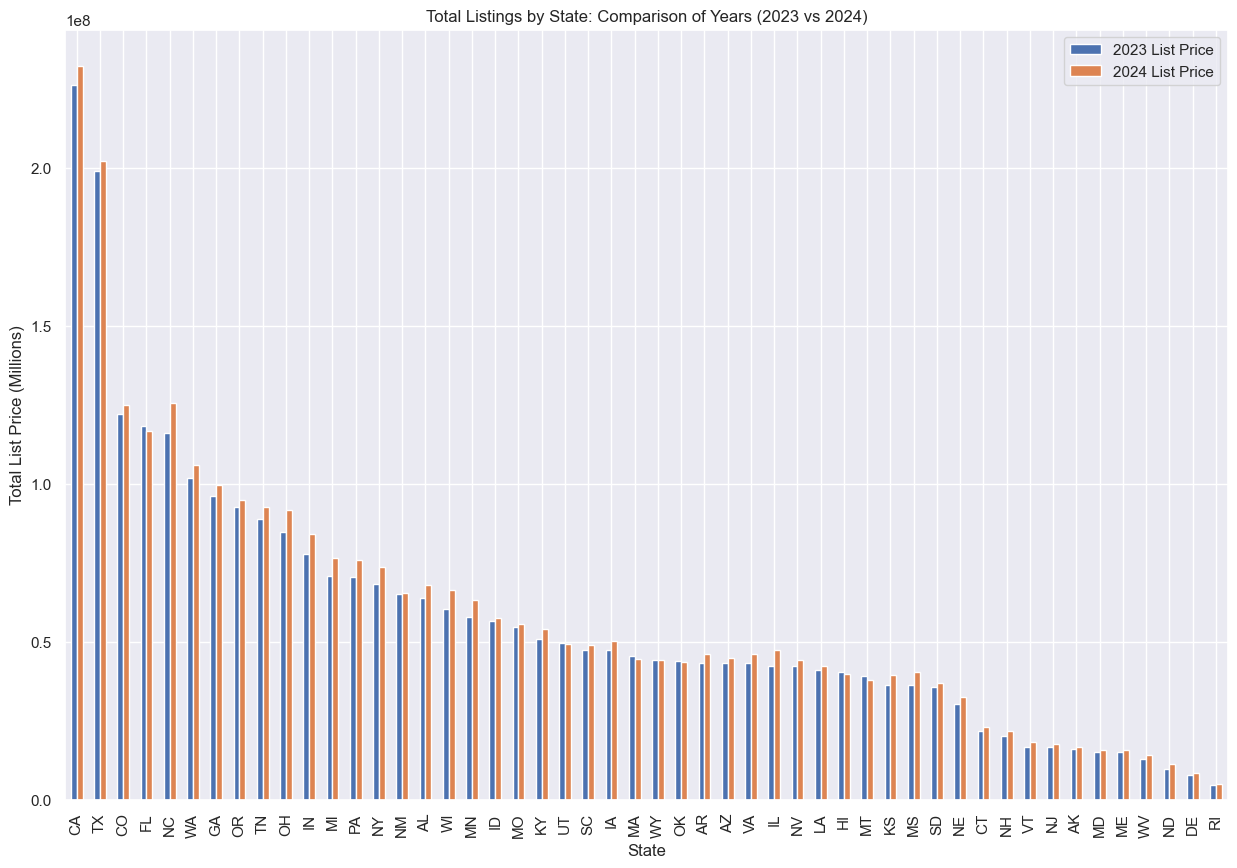

In [152]:
state_totals_comparison.plot(kind='bar', figsize=(15,10))
plt.title("Total Listings by State: Comparison of Years (2023 vs 2024)")
plt.xlabel('State')
plt.ylabel("Total List Price (Millions)")
plt.show()

### We can see that California and Texas have a huge amount homes listed for high prices when compared to the rest of the states. Those numbers still increased in 2024!

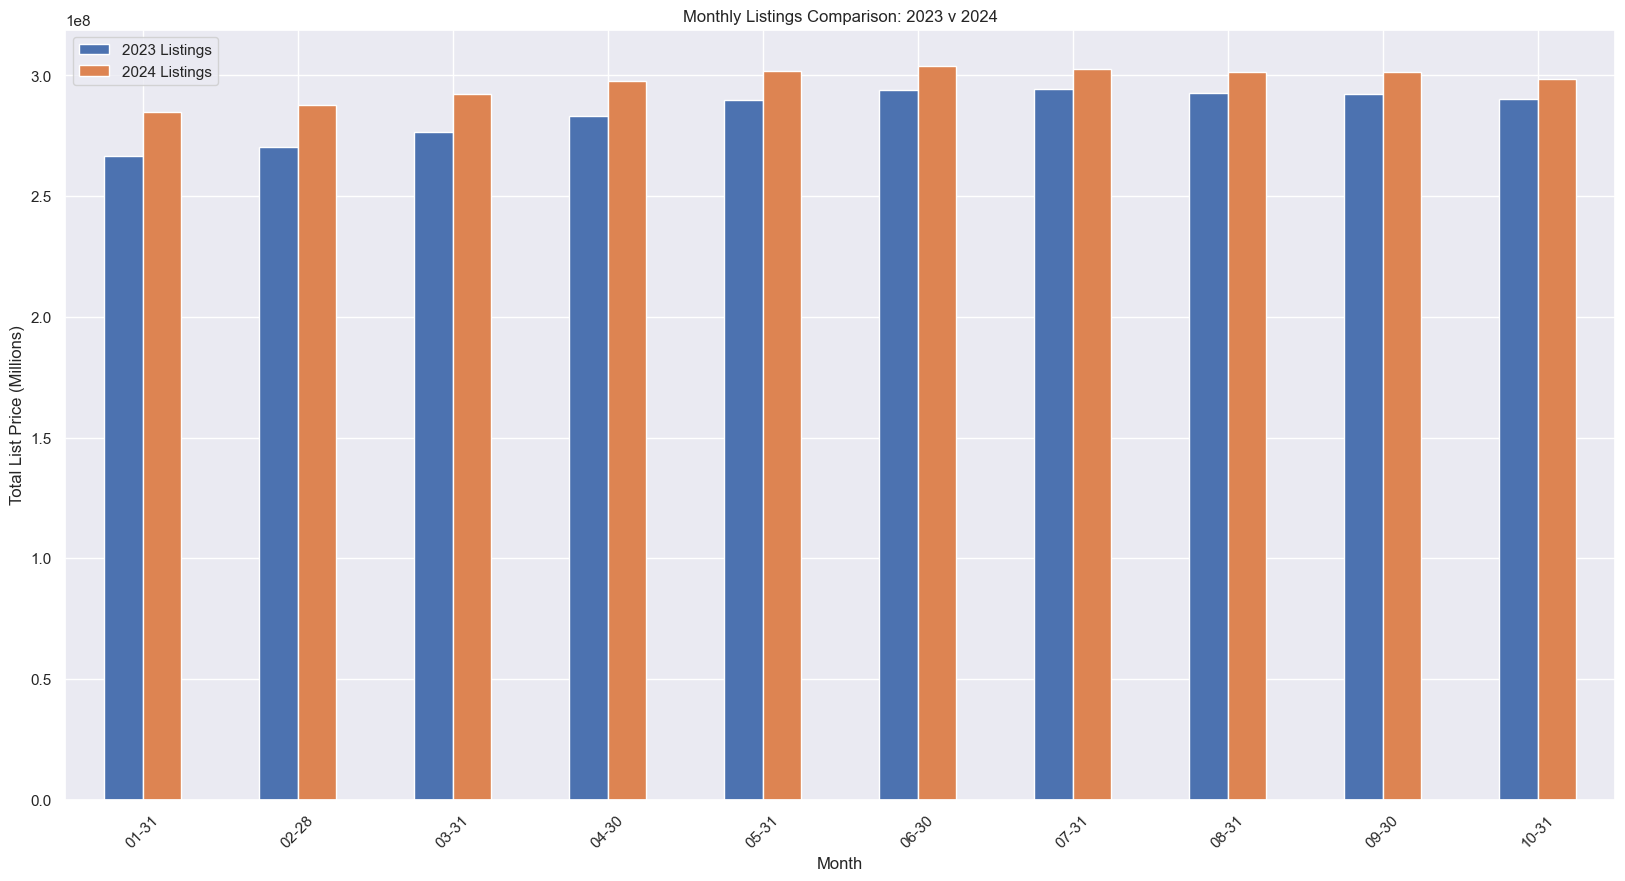

In [155]:
monthly_totals_2023 = price_df[dates_2023].sum()
monthly_totals_2024 = price_df[dates_2024].sum()

price_comparison_df = pd.DataFrame({
    'Month': monthly_totals_2023.index.str.slice(5),
    '2023 Listings': monthly_totals_2023.values,
    '2024 Listings': monthly_totals_2024.values,
})

price_comparison_df.plot(x='Month', kind='bar', figsize=(20,10))
plt.title("Monthly Listings Comparison: 2023 v 2024")
plt.xlabel("Month")
plt.ylabel("Total List Price (Millions)")
plt.xticks(rotation=45)
plt.show()

### Breaking it down by months here helped spread the prices but it is harder to see which month clearly had the most.

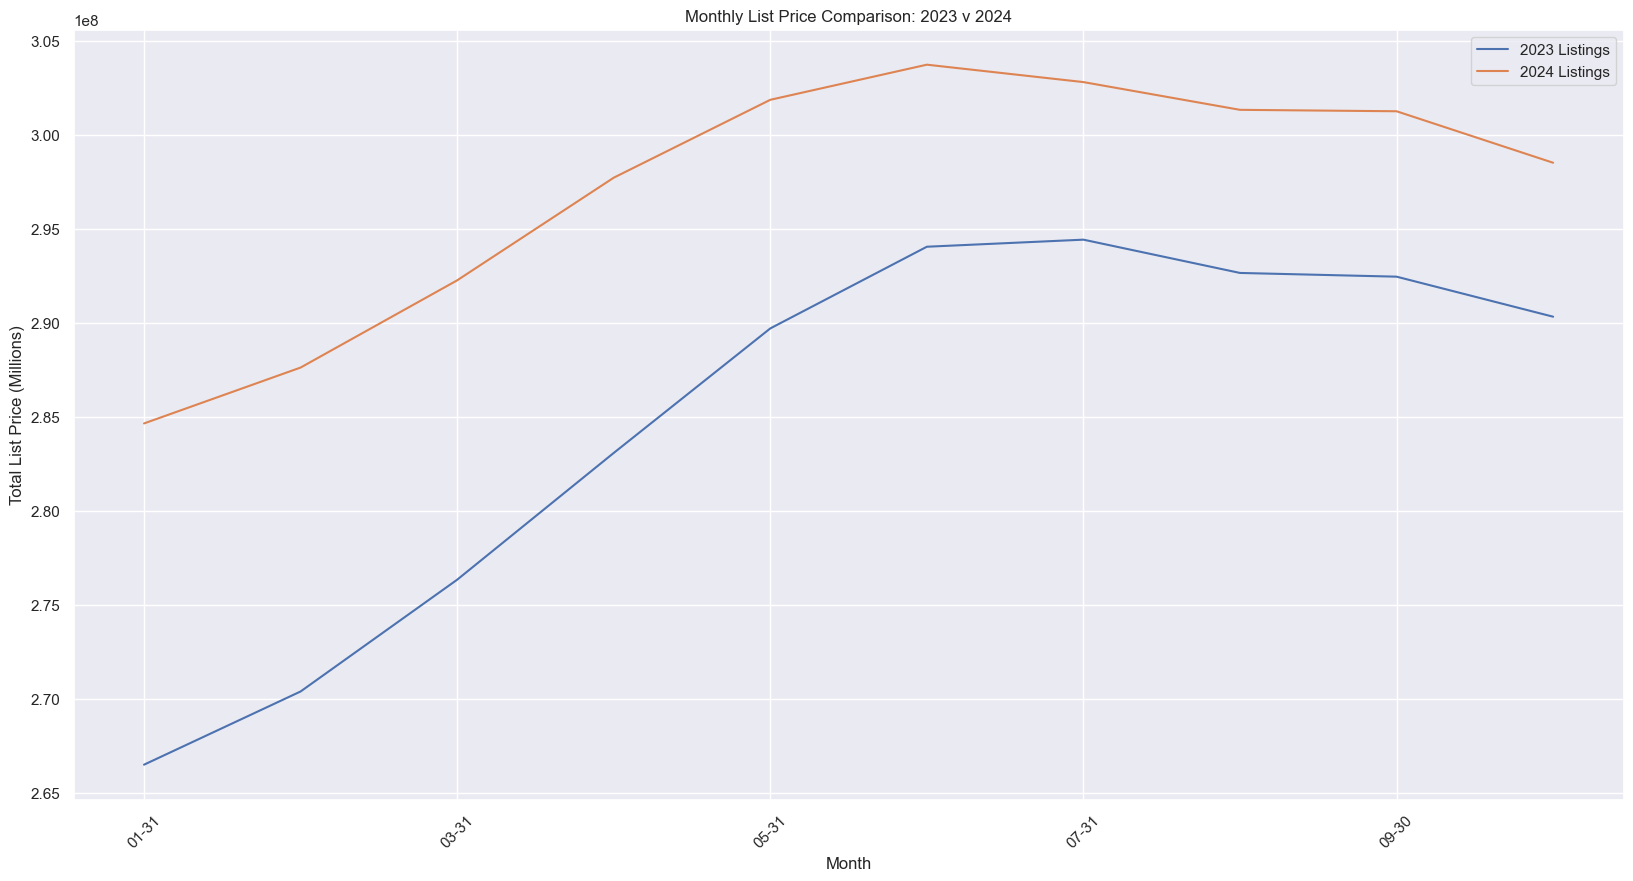

In [158]:
price_comparison_df.plot(x='Month', kind='line', figsize=(20,10))
plt.title("Monthly List Price Comparison: 2023 v 2024")
plt.xlabel("Month")
plt.ylabel("Total List Price (Millions)")
plt.xticks(rotation=45)
plt.show()

### A line graph does a better job of showing us what month was best in both years. For both years the highest prices were in the summer months of June and July. As in the listing graphs, these prices also start to go down as winter approaches. I would say that 2024 saw an increase in home prices for sure, but it is cooling down.

## Overall I would say that at this point in the year that listings and pricings are going down. With the coming winter months people will not be listing as many houses and those that are, will be lowering their prices to sell.

# 3) Should I wait to invest or should I invest now and if so then where should I invest. (You could recommend more than one place)? 10 points (**Matt Henning**)
---

## Should You Invest Now or Wait? Where Should You Invest?

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Load datasets
zhvi_data = pd.read_csv('ZHVI_Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')
zori_data = pd.read_csv('ZORI_Metro_zordi_uc_sfr_month.csv')
market_temp_data = pd.read_csv('MARKET_TEMP_Metro_market_temp_index_uc_sfrcondo_month.csv')
dttp_data = pd.read_csv('DTTP_Metro_mean_doz_pending_uc_sfrcondo_month.csv')
inventory_data = pd.read_csv('FOR_SALE_INVENTORY_Metro_invt_fs_uc_sfr_sm_month.csv')

# Display data to ensure it loaded
zhvi_data.head(), zori_data.head(), market_temp_data.head(), dttp_data.head(), inventory_data.head()
# Reshape datasets for 2023-2024
def reshape_and_filter(df, id_vars, value_name, start_year=2023, end_year=2024):
    df_long = df.melt(id_vars=id_vars, var_name="Date", value_name=value_name)
    df_long["Date"] = pd.to_datetime(df_long["Date"], errors="coerce")
    return df_long[
        (df_long["Date"].dt.year >= start_year) & (df_long["Date"].dt.year <= end_year)
    ]


In [22]:
# Extract the latest data for analysis, rename for zhvi and zori to clarify and tracking
zhvi_latest = zhvi_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'ZHVI_Latest'})
zori_latest = zori_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'ZORI_Latest'})
market_temp_latest = market_temp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'MarketTemp_Latest'})

# Merge datasets, merging the zhvi and zori for region and state, makes it more clear and remove united states as a region
combined_data = pd.merge(zhvi_latest, zori_latest, on=['RegionName', 'StateName'], how='inner')
combined_data = pd.merge(combined_data, market_temp_latest, on=['RegionName', 'StateName'], how='inner')

# Rank markets by metrics, metrics being "hottest" by state/region 
combined_data['ZHVI_Rank'] = combined_data['ZHVI_Latest'].rank(ascending=False)
combined_data['ZORI_Rank'] = combined_data['ZORI_Latest'].rank(ascending=False)
combined_data['MarketTemp_Rank'] = combined_data['MarketTemp_Latest'].rank(ascending=False)

# Calculate overall rank
combined_data['Overall_Rank'] = combined_data[['ZHVI_Rank', 'ZORI_Rank', 'MarketTemp_Rank']].mean(axis=1)

# Top-performing markets
top_markets = combined_data.sort_values(by='Overall_Rank').head(10)
top_markets

,RegionName,StateName,ZHVI_Latest,ZORI_Latest,MarketTemp_Latest,ZHVI_Rank,ZORI_Rank,MarketTemp_Rank,Overall_Rank
35,"San Jose, CA",CA,1.702743e+06,101.0,77.0,1.0,68.5,7.0,25.500000
12,"San Francisco, CA",CA,1.227564e+06,83.0,60.0,6.0,105.0,60.5,57.166667
122,"Salinas, CA",CA,8.409708e+05,141.0,53.0,21.0,24.0,135.0,60.000000
128,"Manchester, NH",NH,5.162688e+05,89.0,68.0,69.0,91.0,21.5,60.500000
6,"Washington, DC",VA,5.962993e+05,78.0,66.0,44.0,117.5,28.0,63.166667
100,"Modesto, CA",CA,4.663186e+05,93.0,61.0,88.0,83.0,53.5,74.833333
26,"Sacramento, CA",CA,5.838314e+05,76.0,62.0,48.0,130.0,48.0,75.333333
57,"Worcester, MA",MA,4.647810e+05,85.0,65.0,89.0,101.0,36.0,75.333333
48,"Hartford, CT",CT,3.820292e+05,101.0,80.0,165.0,68.5,4.0,79.166667
83,"Springfield, MA",MA,3.568748e+05,124.0,68.0,194.0,36.5,21.5,84.000000


In [23]:
# Filter inventory_data and dttp_data for October 2023 to October 2024
def filter_by_date_range(df, start_date, end_date, id_vars, value_name):
    # Melt the dataset to reshape it
    df_long = df.melt(id_vars=id_vars, var_name="Date", value_name=value_name)
    # Convert the Date column to datetime explicitly specifying the format
    df_long["Date"] = pd.to_datetime(df_long["Date"], format="%Y-%m-%d", errors="coerce")
    # Filter by the date range
    return df_long[(df_long["Date"] >= start_date) & (df_long["Date"] <= end_date)]

# Define the date range
start_date = "2023-10-01"
end_date = "2024-10-31"

# Reshape and filter inventory_data
inventory_filtered = filter_by_date_range(
    inventory_data, start_date, end_date, id_vars=["RegionName", "StateName"], value_name="Inventory"
)

# Reshape and filter dttp_data
dttp_filtered = filter_by_date_range(
    dttp_data, start_date, end_date, id_vars=["RegionName", "StateName"], value_name="DaysOnMarket"
)

# Aggregate the filtered data to get the latest values (October 2024)
inventory_latest = inventory_filtered.groupby(["RegionName", "StateName"])["Inventory"].last().reset_index()
dttp_latest = dttp_filtered.groupby(["RegionName", "StateName"])["DaysOnMarket"].last().reset_index()

# Merge the filtered and aggregated data with top markets
investment_data = pd.merge(top_markets, inventory_latest, on=["RegionName", "StateName"], how="inner")
investment_data = pd.merge(investment_data, dttp_latest, on=["RegionName", "StateName"], how="inner")

print(investment_data)

          RegionName StateName   ZHVI_Latest  ZORI_Latest  MarketTemp_Latest  \
0       San Jose, CA        CA  1.702743e+06        101.0               77.0   
1  San Francisco, CA        CA  1.227564e+06         83.0               60.0   
2        Salinas, CA        CA  8.409708e+05        141.0               53.0   
3     Manchester, NH        NH  5.162688e+05         89.0               68.0   
4     Washington, DC        VA  5.962993e+05         78.0               66.0   
5        Modesto, CA        CA  4.663186e+05         93.0               61.0   
6     Sacramento, CA        CA  5.838314e+05         76.0               62.0   
7      Worcester, MA        MA  4.647810e+05         85.0               65.0   
8       Hartford, CT        CT  3.820292e+05        101.0               80.0   
9    Springfield, MA        MA  3.568748e+05        124.0               68.0   

   ZHVI_Rank  ZORI_Rank  MarketTemp_Rank  Overall_Rank Inventory DaysOnMarket  
0        1.0       68.5              7.

In [15]:
# Analyze inventory and days on market trends
inventory_latest = inventory_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'Inventory_Latest'})
dttp_latest = dttp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'DaysOnMarket_Latest'})

# Merge with top markets data
investment_data = pd.merge(top_markets, inventory_latest, on=['RegionName', 'StateName'], how='inner')
investment_data = pd.merge(investment_data, dttp_latest, on=['RegionName', 'StateName'], how='inner')

# Display investment data
investment_data

,RegionName,StateName,ZHVI_Latest,ZORI_Latest,MarketTemp_Latest,ZHVI_Rank,ZORI_Rank,MarketTemp_Rank,Overall_Rank,Inventory_Latest,DaysOnMarket_Latest
0,"San Jose, CA",CA,1.702743e+06,101.0,77.0,1.0,68.5,7.0,25.500000,1933.0,28.0
1,"San Francisco, CA",CA,1.227564e+06,83.0,60.0,6.0,105.0,60.5,57.166667,6139.0,36.0
2,"Salinas, CA",CA,8.409708e+05,141.0,53.0,21.0,24.0,135.0,60.000000,599.0,43.0
3,"Manchester, NH",NH,5.162688e+05,89.0,68.0,69.0,91.0,21.5,60.500000,530.0,19.0
4,"Washington, DC",VA,5.962993e+05,78.0,66.0,44.0,117.5,28.0,63.166667,10456.0,29.0
5,"Modesto, CA",CA,4.663186e+05,93.0,61.0,88.0,83.0,53.5,74.833333,946.0,35.0
6,"Sacramento, CA",CA,5.838314e+05,76.0,62.0,48.0,130.0,48.0,75.333333,5598.0,38.0
7,"Worcester, MA",MA,4.647810e+05,85.0,65.0,89.0,101.0,36.0,75.333333,1672.0,26.0
8,"Hartford, CT",CT,3.820292e+05,101.0,80.0,165.0,68.5,4.0,79.166667,1833.0,20.0
9,"Springfield, MA",MA,3.568748e+05,124.0,68.0,194.0,36.5,21.5,84.000000,1132.0,25.0


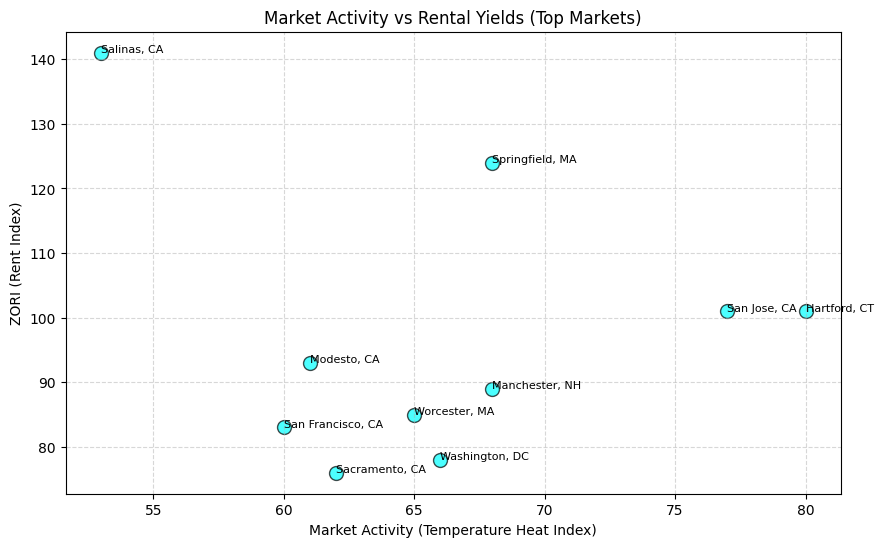

In [16]:
# Scatter plot: Market Activity vs Rental Yields
plt.figure(figsize=(10, 6))
plt.scatter(investment_data['MarketTemp_Latest'], investment_data['ZORI_Latest'], color='cyan', s=100, edgecolors='k', alpha=0.7)
for i, region in enumerate(investment_data['RegionName']):
    plt.text(investment_data['MarketTemp_Latest'].iloc[i], investment_data['ZORI_Latest'].iloc[i], region, fontsize=8)

plt.xlabel('Market Activity (Temperature Heat Index)')
plt.ylabel('ZORI (Rent Index)')
plt.title('Market Activity vs Rental Yields (Top Markets)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### **Market Activity vs Rental Yields**

This scatter plot illustrates the relationship between **Market Activity (Temperature Heat Index)** and **Rental Yields (ZORI)** in the top-performing real estate markets. It helps identify the type of opportunities each market offers based on competition and rental income potential.

- **High Rental Yields, Moderate Competition**:  
  Markets with strong rental yields but lower competition (low temperature index) could be undervalued gems. These areas may provide great opportunities for rental investments with less competition from other buyers. For example, if a market has high ZORI but relatively low Market Activity, it’s likely a lucrative market for rental income.

- **Highly Competitive Markets**:  
  In markets with high activity (high temperature index), such as **San Jose, CA**, rental yields might be lower, but these areas excel in price appreciation. Such markets are ideal for investors interested in flipping or selling upgraded properties quickly at a profit.

- **Key Takeaway**:  
  This plot helps investors balance their strategies:  
  - For rental income, focus on markets with high ZORI and moderate competition.  
  - For flipping and quick resale, target markets with high competition and appreciation potential.  
  Use this visualization to identify which markets align with your investment goals.


<Figure size 1000x800 with 0 Axes>

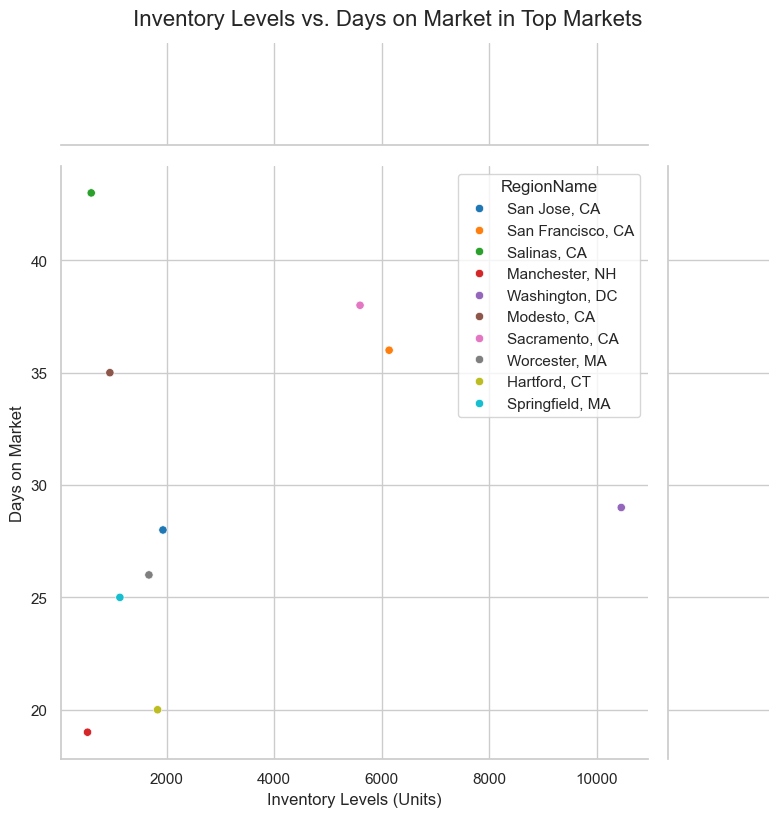

In [17]:
# joint plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.jointplot(
    data=investment_data,
    x="Inventory_Latest",
    y="DaysOnMarket_Latest",
    kind="scatter",
    hue="RegionName",
    palette="tab10",
    height=8,
    marginal_kws=dict(bins=20, fill=True),
)

plt.suptitle("Inventory Levels vs. Days on Market in Top Markets", y=1.02, fontsize=16)
plt.xlabel("Inventory Levels (Units)")
plt.ylabel("Days on Market")
plt.show()



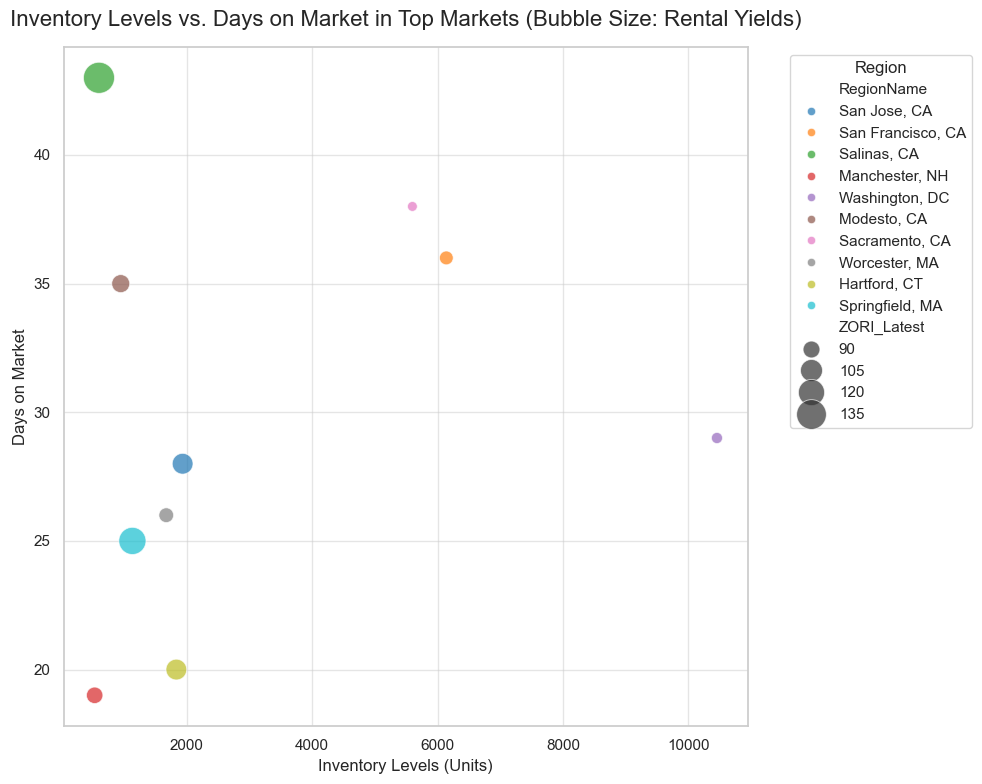

In [19]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Bubble graph
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Create a bubble graph
sns.scatterplot(
    data=investment_data,
    x="Inventory_Latest",
    y="DaysOnMarket_Latest",
    size="ZORI_Latest",  # Bubble size reflects rental yields (or choose another metric)
    hue="RegionName",  # Different colors for regions
    palette="tab10",  # Color palette for regions
    sizes=(50, 500),  # Adjust size range for bubbles
    alpha=0.7  # Transparency for better visibility
)

# Add titles and labels
plt.title("Inventory Levels vs. Days on Market in Top Markets (Bubble Size: Rental Yields)", fontsize=16, pad=15)
plt.xlabel("Inventory Levels (Units)", fontsize=12)
plt.ylabel("Days on Market", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Region")
plt.grid(alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()



### **Inventory Levels vs. Days on Market**

These visualizations explore the relationship between **Inventory Levels** and **Days on Market** in the top-performing real estate markets. 

  - **Scatter Plot**: Each point represents a market (region), showing how much inventory is available (x-axis) and how quickly homes are selling (y-axis).
  - **Hue for Region Names**: Each market is color-coded to help differentiate between the top-performing locations.
  - **Marginal Distributions**: Histograms along the axes show the distribution of inventory levels and days on market, revealing overall trends.
  -  **Bubble Chart**: This bubble chart explores the relationship between **Inventory Levels** (x-axis) and **Days on Market** (y-axis) in the top-performing real estate markets. It also incorporates:
- **Bubble Size**: Reflects rental yields (ZORI_Latest), with larger bubbles representing higher rental profitability.
- **Hue for Region Names**: Each region is color-coded, allowing easy differentiation between markets.


- **Key Insights**:
  1. **Low Inventory, Low Days on Market**:  
     Markets with low inventory and quick sales (e.g., low days on market) are highly competitive, making them ideal for flipping or quick resale. These markets indicate high buyer demand and fast-moving properties.
  2. **High Inventory, High Days on Market**:  
     Markets with higher inventory and longer days on market may offer opportunities for investors to negotiate better deals. These areas are more suited for rental investments, where securing a property at a lower cost may yield higher returns over time.
  3. **Balanced Markets**:  
     Some markets show moderate inventory levels and days on market, striking a balance between availability and demand. These markets can be a good choice for both flipping and long-term investments.

- **Why I care**:  
  This visualization helps you identify markets that align with your goals:
  - For **quick resale**: Look for markets with low inventory and days on market.  
  - For **long-term rental investments**: Focus on markets with higher inventory, as they may provide more favorable purchase conditions.

Th scatter plot and bubble chart show how competitive a market is.


In [41]:
print(investment_data.columns)


Index(['RegionName', 'StateName', 'ZHVI_Latest', 'ZORI_Latest',
       'MarketTemp_Latest', 'ZHVI_Rank', 'ZORI_Rank', 'MarketTemp_Rank',
       'Overall_Rank', 'Inventory_Latest', 'DaysOnMarket_Latest'],
      dtype='object')


In [42]:
# Rename columns for heatmp
investment_data = investment_data.rename(columns={
    "inventory_latest": "Inventory",
    "days_on_market_latest": "DaysOnMarket"
})

In [43]:
# Merge inventory and days on market data with top markets
investment_data = pd.merge(
    top_markets,
    inventory_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'Inventory'}),
    on=['RegionName', 'StateName'],
    how='inner'
)
investment_data = pd.merge(
    investment_data,
    dttp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'DaysOnMarket'}),
    on=['RegionName', 'StateName'],
    how='inner'
)

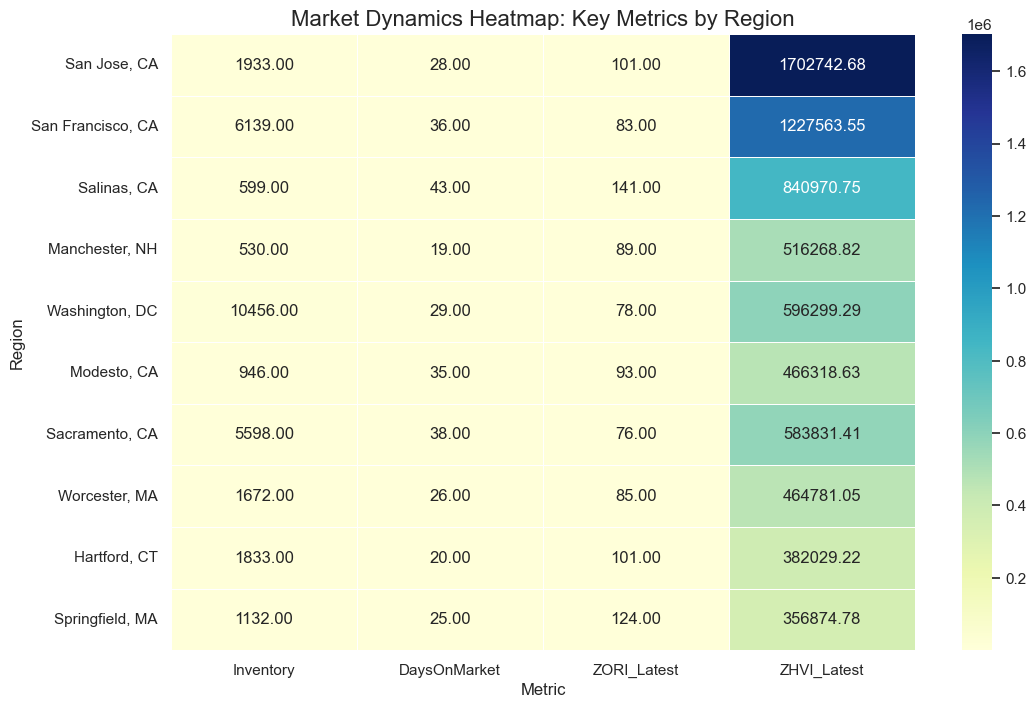

In [44]:
# Prepare data for the heatmap
heatmap_data = investment_data.set_index("RegionName")[["Inventory", "DaysOnMarket", "ZORI_Latest", "ZHVI_Latest"]]


# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Market Dynamics Heatmap: Key Metrics by Region", fontsize=16)
plt.ylabel("Region", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.show()



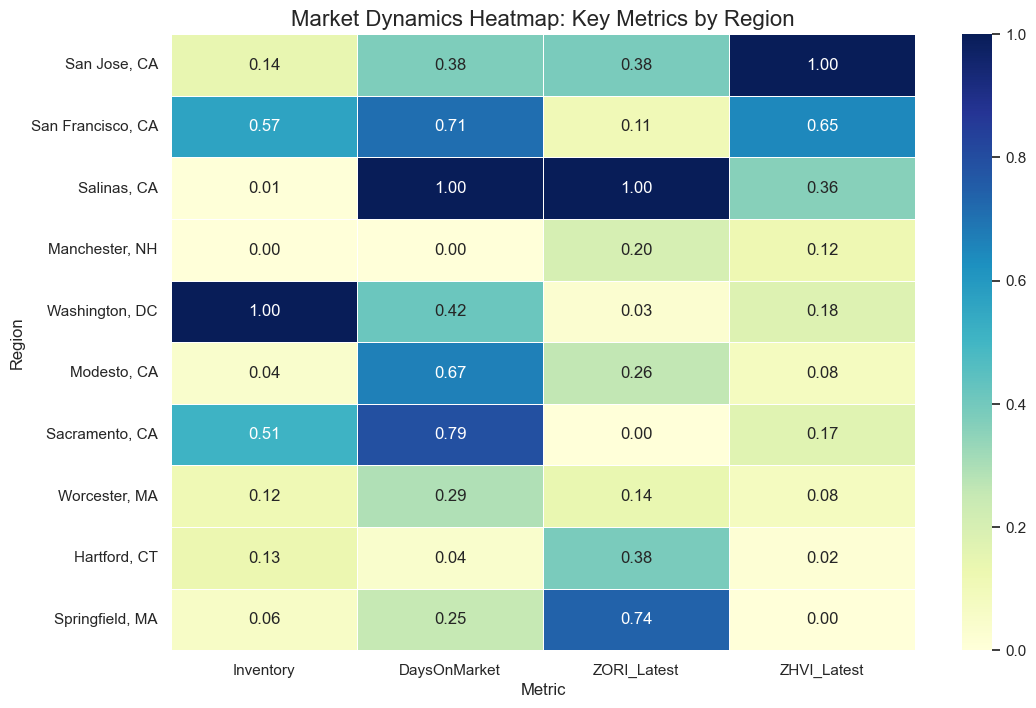

In [46]:
# exact same as before but with each metric normalized, easier on the eyes
heatmap_data = investment_data.set_index("RegionName")[["Inventory", "DaysOnMarket", "ZORI_Latest", "ZHVI_Latest"]]
#added after too much trial and error to "normalize the data"
heatmap_data = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Market Dynamics Heatmap: Key Metrics by Region", fontsize=16)
plt.ylabel("Region", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.show()



## **Market Dynamics Heatmap: Key Metrics by Region**

This heatmap provides a side-by-side comparison of the four metrics provided by Zillow metrics across several regions. Each metric is normalized (scaled between 0 and 1) to make comparisons across different scales possible. Darker shades indicate higher values, while lighter shades indicate lower values.

---

### **Zillow Metrics Explained**
1. **Inventory**:
   - Measures the number of homes available for sale in the region.
   - **Darker cells** (higher values): Indicate regions with more inventory, suggesting a buyer's market with less competition.
   - **Lighter cells** (lower values): Indicate tighter inventory, signaling a seller's market.

2. **Days on Market (DOM)**:
   - Tracks how quickly properties are selling in the region.
   - **Darker cells** (higher values): Indicate properties take longer to sell, possibly due to lower demand or higher pricing.
   - **Lighter cells** (lower values): Indicate "hot" markets with high buyer demand and quick sales.

3. **ZORI_Latest**:
   - Reflects the rental yields (Zillow Observed Rent Index) in the region.
   - **Darker cells** (higher values): Indicate stronger rental demand and higher profitability for landlords.
   - **Lighter cells** (lower values): Suggest lower rental profitability.

4. **ZHVI_Latest**:
   - Represents home value appreciation (Zillow Home Value Index).
   - **Darker cells** (higher values): Indicate regions with strong price growth and high property values.
   - **Lighter cells** (lower values): Suggest lower appreciation potential.

---

### **Key Insights**
1. **San Jose, CA**:
   - **Low Inventory** (0.14) but **High ZHVI_Latest** (1.00): Indicates a highly competitive market with strong home value growth, ideal for *immediate* appreciation-focused investments.

2. **Salinas, CA**:
   - **Extremely Low Inventory** (0.01) and **High ZORI_Latest** (1.00): Suggests a tight rental market with high profitability for landlords.

3. **Manchester, NH**:
   - **Very Low Inventory** (0.00) and **Moderate Rental Yields** (0.20): Indicates strong demand but lower rental profitability compared to other markets.

4. **Washington, DC**:
   - **High Inventory** (1.00) but **Low Rental Yields** (0.03): Suggests a cooling market with opportunities for negotiation but less attractive for rental income.

5. **Springfield, MA**:
   - **Moderate Inventory** (0.06) and **High ZORI_Latest** (0.74): A balanced market offering strong rental yields and moderate competition.

---

### **How to Use This Heatmap**
- **For Flipping**:
  - Focus on regions with **low inventory** and **high ZHVI_Latest**, such as *San Jose, CA* and *Salinas, CA*.
- **For Rental Income**:
  - Target regions with **high ZORI_Latest**, like *Salinas, CA* or *Springfield, MA*, for strong rental profitability.
- **Bonus Opportunities**:
  - Check out regions with **high inventory** and **long days on market**, like *Washington, DC*, where buyers have leverage.



### **Conclusion on Q3 -- Should You Invest Now or Wait? Where Should You Invest?**

Given the current market trends, **now is a favorable time to invest** in real estate. Many markets demonstrate strong price growth and competitive activity, suggesting demand remains high. 

- **Invest Now If**: You aim to capitalize on current market dynamics, particularly in competitive regions with strong price appreciation like **San Jose, CA**. Quick resale opportunities are better in these high-demand markets.
- **Recommended Markets**:
  - For rental income: *Salinas, CA* and *Springfield, MA*, with strong rental yields and moderate competition.
  - For flipping: *San Francisco, CA* and *San Jose, CA*, where price appreciation remains robust, and demand is strong.

Investing now in the above chosen markets to yield significant returns.

# 4) How long some of the real-estate stays on the market before they rent or sell? 10 points (**Tracy Mengyuan Cui**)
---

# 5) How much average profit I could expect from my investments in terms of sale (% dollars) after paying mortgage. Calculate my ~ROI. 10 Points (**David Braun**)
---

# 6) How much average monthly income I could expect from my investments in terms of lease/rent after upgrading properties, paying mortgage, and paying taxes. Calculate my ~ROI. 10 Points (**Soad Ahmed**)
---